In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.stattools import durbin_watson
import zipfile

# 1. First Model

## 1.1 Import Data

### 1.1.1 Import Diabetes Data

In [2]:
path_diabetes = Path('IHME_USA_COUNTY_DIABETES_PREVALENCE_1999_2012_NATIONAL_Y2016M08D23.XLSX')
df_diabetes = pd.read_excel(path_diabetes)

### 1.1.2 Import Race Data

In [3]:
path_race = Path('county_demographics.csv')
df_race = pd.read_csv(path_race)

### 1.1.3 Import Income Data

In [4]:
path_income = Path('lapi1124.xlsx')
df_income = pd.read_excel(path_income)

### 1.1.4 Import Education Data

In [5]:
path_education = Path('Education.xlsx')
df_education = pd.read_excel(path_education)

## 1.2 Observe Data

### 1.2.1 Observe Diabetes Data

In [6]:
df_diabetes

,"Diagnosed and Undiagnosed Diabetes Prevalence by County in the U.S., 1999-2012 (Diabetes Care, 2016)",Unnamed: 1
0,NaN,NaN
1,Tab name,Description
2,Diagnosed,The proportion of adults age 20+ who report a ...
3,Undiagnosed,The proportion of adults age 20+ who do not re...
4,Total,The proportion of adults age 20+ who report a ...
5,Awareness,The proportion of adults age 20+ with a previo...
6,Control,The proportion of adults age 20+ with a previo...
7,NaN,*High FPG/A1C is fasting plasma glucose at lea...
8,NaN,NaN
9,Data citation: Institute for Health Metrics an...,NaN


In [7]:
df_diabetes = pd.read_excel(path_diabetes, sheet_name=None)
df_diabetes.keys()

dict_keys(['Overview', 'Diagnosed', 'Undiagnosed', 'Total', 'Awareness', 'Control'])

Conclusion: The excel file has 6 sheets and what we need is the data in the 'Diagnosed' sheet.

In [8]:
df_diabetes = pd.read_excel(path_diabetes, sheet_name='Diagnosed')
df_diabetes

,Age-Standardized Diagnosed Diabetes Prevalence (%),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females",...,"Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
1,National,NaN,6.52,6.27,6.78,6.96,6.7,7.23,7.37,7.1,...,10.21,9.98,9.6,10.38,10.22,9.85,10.62,56.61,57.09,56.85
2,Alabama,1,7.94,7.78,8.1,8.41,8.25,8.58,8.93,8.78,...,11.59,11.74,11.76,11.72,12.08,12.01,12.16,50.03,54.38,52.23
3,Autauga County,1001,7.84,7.7,7.99,8.25,8.09,8.42,8.67,8.47,...,11.21,11.24,10.84,11.68,11.44,10.92,12,50.21,41.97,46.03
4,Baldwin County,1003,6.35,5.5,7.26,6.73,5.85,7.66,7.15,6.27,...,10.12,9.52,8.87,10.22,9.76,9.16,10.39,43.24,66.52,53.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,Sweetwater County,56037,5.52,5.09,5.99,5.85,5.39,6.35,6.2,5.74,...,9.35,9.05,8.56,9.58,9.23,8.72,9.78,63.27,71.42,67.14
3191,Teton County,56039,3.25,3.18,3.33,3.6,3.53,3.68,3.88,3.8,...,5.82,5.81,5.66,5.97,5.91,5.76,6.07,82,81.26,81.63
3192,Uinta County,56041,5.22,5.15,5.3,5.57,5.51,5.64,5.88,5.8,...,8.35,8.12,7.72,8.56,8.57,8.11,9.05,70.73,57.53,64.02
3193,Washakie County,56043,5.64,6.07,5.19,5.97,6.41,5.5,6.21,6.58,...,8.08,7.94,7.73,8.15,8.27,7.92,8.63,66.45,30.54,46.53


In [9]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 47 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Age-Standardized Diagnosed Diabetes Prevalence (%)  3195 non-null   object
 1   Unnamed: 1                                          3194 non-null   object
 2   Unnamed: 2                                          3195 non-null   object
 3   Unnamed: 3                                          3195 non-null   object
 4   Unnamed: 4                                          3195 non-null   object
 5   Unnamed: 5                                          3195 non-null   object
 6   Unnamed: 6                                          3195 non-null   object
 7   Unnamed: 7                                          3195 non-null   object
 8   Unnamed: 8                                          3195 non-null   object
 9   Unnamed:

In [10]:
df_diabetes.isnull().sum()

Age-Standardized Diagnosed Diabetes Prevalence (%)    0
Unnamed: 1                                            1
Unnamed: 2                                            0
Unnamed: 3                                            0
Unnamed: 4                                            0
Unnamed: 5                                            0
Unnamed: 6                                            0
Unnamed: 7                                            0
Unnamed: 8                                            0
Unnamed: 9                                            0
Unnamed: 10                                           0
Unnamed: 11                                           0
Unnamed: 12                                           0
Unnamed: 13                                           0
Unnamed: 14                                           0
Unnamed: 15                                           0
Unnamed: 16                                           0
Unnamed: 17                                     

In [11]:
df_diabetes.describe()

,Age-Standardized Diagnosed Diabetes Prevalence (%),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
count,3195,3194,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00,3195.0,3195.00,...,3195.00,3195.00,3195.00,3195.0,3195.00,3195.00,3195.00,3195.00,3195.00,3195.00
unique,1929,3194,631.00,700.00,577.00,680.00,751.00,624.00,695.0,757.00,...,765.00,830.00,906.00,770.0,848.00,925.00,792.00,2120.00,2231.00,2077.00
top,Washington County,FIPS,6.45,6.24,6.52,6.93,5.71,6.09,7.4,5.81,...,9.91,9.78,9.53,10.6,8.47,9.74,9.31,56.71,68.78,59.13
freq,30,1,19.00,20.00,20.00,18.00,16.00,18.00,19.0,16.00,...,14.00,13.00,14.00,17.0,15.00,15.00,14.00,11.00,7.00,8.00


### 1.2.2 Observe Race Data

In [12]:
df_race

,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,...,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,Abbeville County,SC,22.4,19.8,4.7,15.6,81.7,1416,0.3,0.4,...,51.8,12507,91371,1450,543,689,317,1080,187,1211
1,Acadia Parish,LA,15.8,25.8,6.9,13.3,79.0,4533,0.4,0.3,...,94.3,52706,602739,4664,1516,2629,705,3734,388,4007
2,Accomack County,VA,24.6,20.7,5.6,19.5,81.5,2387,0.7,0.8,...,73.8,53568,348195,2997,802,1716,335,2560,212,2536
3,Ada County,ID,14.9,23.2,5.6,38.5,95.2,41464,0.8,2.7,...,372.8,763099,5766679,41789,14661,19409,3099,36701,3803,35132
4,Adair County,IA,23.0,21.8,5.6,18.5,94.2,609,0.3,0.5,...,13.5,-1,63002,914,304,499,0,861,185,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,Yuma County,AZ,19.3,25.1,7.1,15.0,73.3,9896,2.3,1.5,...,35.5,307540,1995974,10846,4298,4529,5749,4476,839,9265
3135,Yuma County,CO,18.7,27.4,7.5,21.8,88.6,1020,1.0,0.5,...,4.2,8501,125565,1492,391,797,45,1350,66,1278
3136,Zapata County,TX,13.2,33.1,8.6,11.6,61.9,1452,0.5,0.2,...,14.0,-1,75681,1964,818,1003,1680,235,181,1738
3137,Zavala County,TX,14.6,28.4,7.2,10.9,66.9,837,1.1,0.3,...,9.0,8808,45596,1232,486,674,1062,159,42,1178


In [13]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 43 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   County                                                        3139 non-null   object 
 1   State                                                         3139 non-null   object 
 2   Age.Percent 65 and Older                                      3139 non-null   float64
 3   Age.Percent Under 18 Years                                    3139 non-null   float64
 4   Age.Percent Under 5 Years                                     3139 non-null   float64
 5   Education.Bachelor's Degree or Higher                         3139 non-null   float64
 6   Education.High School or Higher                               3139 non-null   float64
 7   Employment.Nonemployer Establishments                         3139 no

In [14]:
df_race.isnull().sum()

County                                                          0
State                                                           0
Age.Percent 65 and Older                                        0
Age.Percent Under 18 Years                                      0
Age.Percent Under 5 Years                                       0
Education.Bachelor's Degree or Higher                           0
Education.High School or Higher                                 0
Employment.Nonemployer Establishments                           0
Ethnicities.American Indian and Alaska Native Alone             0
Ethnicities.Asian Alone                                         0
Ethnicities.Black Alone                                         0
Ethnicities.Hispanic or Latino                                  0
Ethnicities.Native Hawaiian and Other Pacific Islander Alone    0
Ethnicities.Two or More Races                                   0
Ethnicities.White Alone                                         0
Ethnicitie

In [15]:
df_race.describe()

,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,...,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
count,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3.139000e+03,3139.000000,3139.000000,3139.000000,3139.000000,...,3139.000000,3.139000e+03,3.139000e+03,3.139000e+03,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3.139000e+03
mean,19.759828,21.914431,5.750430,21.981841,86.951927,8.360340e+03,2.317936,1.573463,9.360593,9.773813,...,259.362982,2.190356e+05,1.342061e+06,9.015300e+03,3154.674737,4799.379102,2536.359669,6128.747053,811.652437,7.741874e+03
std,4.807341,3.468644,1.106273,9.569848,6.258044,3.361605e+04,7.424452,2.954798,14.451943,13.870306,...,1725.202893,9.826798e+05,4.472977e+06,3.418417e+04,12967.392485,18048.045913,17156.641150,17744.464030,2469.515227,3.062213e+04
min,4.900000,-1.000000,-1.000000,0.000000,26.400000,-1.000000e+00,-1.000000,-1.000000,-1.000000,0.600000,...,0.000000,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,16.700000,19.900000,5.100000,15.400000,83.350000,7.270000e+02,0.400000,0.500000,0.900000,2.500000,...,17.000000,1.537000e+03,8.602400e+04,8.955000e+02,270.000000,470.500000,41.000000,729.000000,87.000000,7.370000e+02
50%,19.400000,21.900000,5.700000,19.600000,88.300000,1.658000e+03,0.700000,0.800000,2.500000,4.500000,...,45.200000,2.563500e+04,2.629280e+05,2.070000e+03,633.000000,1098.000000,165.000000,1707.000000,213.000000,1.680000e+03
75%,22.300000,23.800000,6.300000,26.000000,91.500000,4.439500e+03,1.400000,1.450000,10.900000,10.150000,...,113.850000,1.061310e+05,8.371585e+05,5.269500e+03,1670.000000,2878.500000,654.000000,4452.000000,560.000000,4.426500e+03
max,58.200000,41.700000,12.500000,77.600000,98.900000,1.107080e+06,86.800000,43.400000,86.600000,96.400000,...,69467.500000,2.428383e+07,1.213894e+08,1.146701e+06,439513.000000,601676.000000,631218.000000,481643.000000,69608.000000,1.044750e+06


### 1.2.3 Observe Income Data

In [16]:
df_income

,"Table 1. Per Capita Personal Income, by County, 2021–2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Per capita personal income1,NaN,NaN,NaN,Percent change from preceding period,NaN,NaN
1,NaN,Dollars,NaN,NaN,Rank in state,Percent change,NaN,Rank in state
2,NaN,2021,2022.0,2023.0,2023,2022,2023.0,2023
3,United States,64460,66244.0,69810.0,--,2.8,5.4,--
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3219,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3220,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3221,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3224 entries, 0 to 3223
Data columns (total 8 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Table 1. Per Capita Personal Income, by County, 2021–2023  3170 non-null   object 
 1   Unnamed: 1                                                 3168 non-null   object 
 2   Unnamed: 2                                                 3166 non-null   float64
 3   Unnamed: 3                                                 3166 non-null   float64
 4   Unnamed: 4                                                 3167 non-null   object 
 5   Unnamed: 5                                                 3168 non-null   object 
 6   Unnamed: 6                                                 3166 non-null   float64
 7   Unnamed: 7                                                 3167 non-null   object 
dtypes: float6

In [18]:
df_income.isnull().sum()

Table 1. Per Capita Personal Income, by County, 2021–2023    54
Unnamed: 1                                                   56
Unnamed: 2                                                   58
Unnamed: 3                                                   58
Unnamed: 4                                                   57
Unnamed: 5                                                   56
Unnamed: 6                                                   58
Unnamed: 7                                                   57
dtype: int64

In [19]:
df_income.describe()

,Unnamed: 2,Unnamed: 3,Unnamed: 6
count,3166.000000,3166.000000,3166.000000
mean,55576.690145,58017.679406,5.036639
std,17371.756905,18661.024789,36.141942
min,2022.000000,2023.000000,-28.000000
25%,45682.500000,47717.000000,3.300000
50%,51916.500000,54087.000000,4.900000
75%,60952.000000,63599.000000,6.100000
max,418669.000000,471751.000000,2023.000000


### 1.2.4 Observe Education Data

In [20]:
df_education

,"Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,"Note: For 1970 and 1980, the share of adults w...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Source: USDA, Economic Research Service using ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...
3,00000,US,United States,NaN,NaN,NaN,NaN,52373312,34158051,11650730,...,28.993579,28.484955,24599698,59741825,64508122,77751347,10.855953,26.364326,28.467714,34.312006
4,01000,AL,Alabama,NaN,NaN,NaN,NaN,1062306,468269,136287,...,29.022866,22.264896,421180,1041725,1032770,932845,12.284601,30.384102,30.12291,27.208387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,72145,PR,Vega Baja Municipio,1,1,1,1,NaN,NaN,NaN,...,23.959976,17.584094,9267,11653,8932,10001,23.252955,29.239957,22.412365,25.094723
3293,72147,PR,Vieques Municipio,12,12,7,6,NaN,NaN,NaN,...,15.886045,10.140029,1668,2793,681,875,27.721456,46.418481,11.317933,14.542131
3294,72149,PR,Villalba Municipio,2,2,2,2,NaN,NaN,NaN,...,14.340816,15.207082,3274,5344,3555,3358,21.08042,34.408602,22.889704,21.621274
3295,72151,PR,Yabucoa Municipio,1,1,1,1,NaN,NaN,NaN,...,19.986177,12.912144,5674,5824,6852,4147,25.221141,25.887896,30.457394,18.433569


In [21]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 55 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022  3297 non-null   object
 1   Unnamed: 1                                                                                                 3295 non-null   object
 2   Unnamed: 2                                                                                                 3295 non-null   object
 3   Unnamed: 3                                                                                                 3222 non-null   object
 4   Unnamed: 4                                                                    

In [22]:
df_education.isnull().sum()

Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022      0
Unnamed: 1                                                                                                     2
Unnamed: 2                                                                                                     2
Unnamed: 3                                                                                                    75
Unnamed: 4                                                                                                    75
Unnamed: 5                                                                                                    75
Unnamed: 6                                                                                                    74
Unnamed: 7                                                                                                   110
Unnamed: 8                                                                                      

In [23]:
df_education.describe()

,"Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
count,3297,3295,3295,3222,3222,3222,3223,3187,3187,3187,...,3275.000000,3275,3276,3276,3276,3276,3276.000000,3276.000000,3276.000000,3276.000000
unique,3297,54,2028,13,13,10,10,2895,2695,2019,...,3273.000000,3271,2678,3012,3019,2876,3270.000000,3271.000000,3275.000000,3274.000000
top,"Note: For 1970 and 1980, the share of adults w...",TX,Washington County,2,2,6,9,2139,1378,612,...,33.044688,20,370,2502,3555,911,5.357143,39.655172,15.037475,62.636093
freq,1,255,30,703,764,597,590,4,5,8,...,2.000000,3,5,4,4,4,2.000000,2.000000,2.000000,2.000000


## 1.3 Data Processing

### 1.3.1 Processing Data for Diabetes

In [24]:
df_diabetes

,Age-Standardized Diagnosed Diabetes Prevalence (%),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females",...,"Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
1,National,NaN,6.52,6.27,6.78,6.96,6.7,7.23,7.37,7.1,...,10.21,9.98,9.6,10.38,10.22,9.85,10.62,56.61,57.09,56.85
2,Alabama,1,7.94,7.78,8.1,8.41,8.25,8.58,8.93,8.78,...,11.59,11.74,11.76,11.72,12.08,12.01,12.16,50.03,54.38,52.23
3,Autauga County,1001,7.84,7.7,7.99,8.25,8.09,8.42,8.67,8.47,...,11.21,11.24,10.84,11.68,11.44,10.92,12,50.21,41.97,46.03
4,Baldwin County,1003,6.35,5.5,7.26,6.73,5.85,7.66,7.15,6.27,...,10.12,9.52,8.87,10.22,9.76,9.16,10.39,43.24,66.52,53.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,Sweetwater County,56037,5.52,5.09,5.99,5.85,5.39,6.35,6.2,5.74,...,9.35,9.05,8.56,9.58,9.23,8.72,9.78,63.27,71.42,67.14
3191,Teton County,56039,3.25,3.18,3.33,3.6,3.53,3.68,3.88,3.8,...,5.82,5.81,5.66,5.97,5.91,5.76,6.07,82,81.26,81.63
3192,Uinta County,56041,5.22,5.15,5.3,5.57,5.51,5.64,5.88,5.8,...,8.35,8.12,7.72,8.56,8.57,8.11,9.05,70.73,57.53,64.02
3193,Washakie County,56043,5.64,6.07,5.19,5.97,6.41,5.5,6.21,6.58,...,8.08,7.94,7.73,8.15,8.27,7.92,8.63,66.45,30.54,46.53


In [25]:
df_diabetes.columns = df_diabetes.iloc[0]  # Set the first row as the header
df_diabetes = df_diabetes[1:]  # Drop the first row from the DataFrame
df_diabetes = df_diabetes.reset_index(drop=True)  # Reset the index if needed
df_diabetes

,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females",...,"Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
0,National,NaN,6.52,6.27,6.78,6.96,6.7,7.23,7.37,7.1,...,10.21,9.98,9.6,10.38,10.22,9.85,10.62,56.61,57.09,56.85
1,Alabama,1,7.94,7.78,8.1,8.41,8.25,8.58,8.93,8.78,...,11.59,11.74,11.76,11.72,12.08,12.01,12.16,50.03,54.38,52.23
2,Autauga County,1001,7.84,7.7,7.99,8.25,8.09,8.42,8.67,8.47,...,11.21,11.24,10.84,11.68,11.44,10.92,12,50.21,41.97,46.03
3,Baldwin County,1003,6.35,5.5,7.26,6.73,5.85,7.66,7.15,6.27,...,10.12,9.52,8.87,10.22,9.76,9.16,10.39,43.24,66.52,53.65
4,Barbour County,1005,9.52,9.4,9.64,10.2,10.08,10.33,10.84,10.75,...,13.77,14.37,14.42,14.31,14.65,14.7,14.59,51.3,56.33,53.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Sweetwater County,56037,5.52,5.09,5.99,5.85,5.39,6.35,6.2,5.74,...,9.35,9.05,8.56,9.58,9.23,8.72,9.78,63.27,71.42,67.14
3190,Teton County,56039,3.25,3.18,3.33,3.6,3.53,3.68,3.88,3.8,...,5.82,5.81,5.66,5.97,5.91,5.76,6.07,82,81.26,81.63
3191,Uinta County,56041,5.22,5.15,5.3,5.57,5.51,5.64,5.88,5.8,...,8.35,8.12,7.72,8.56,8.57,8.11,9.05,70.73,57.53,64.02
3192,Washakie County,56043,5.64,6.07,5.19,5.97,6.41,5.5,6.21,6.58,...,8.08,7.94,7.73,8.15,8.27,7.92,8.63,66.45,30.54,46.53


In [26]:
df_diabetes = df_diabetes.drop(['Percent Change, 1999-2012, Males',
                              'Percent Change, 1999-2012, Females','Percent Change, 1999-2012, Both Sexes'], axis=1)    
# drop the last few columns
df_diabetes = df_diabetes.drop(columns=[col for col in df_diabetes.columns if 'Male' in col or 'Female' in col])   # just keep both sexes
df_diabetes = df_diabetes.rename(columns=({'Location':'county'}))   # change the column name for uniform
df_diabetes

,county,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes"
0,National,NaN,6.52,6.96,7.37,7.7,8.11,8.11,8.55,8.94,9.29,9.39,9.65,9.82,9.98,10.22
1,Alabama,1,7.94,8.41,8.93,9.25,9.66,9.66,10.17,10.6,11.02,11.1,11.42,11.63,11.74,12.08
2,Autauga County,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44
3,Baldwin County,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76
4,Barbour County,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Sweetwater County,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23
3190,Teton County,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91
3191,Uinta County,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57
3192,Washakie County,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27


In [27]:
# Initialize an empty column for the state
df_diabetes['state'] = None

# Variable to store the current state
current_state = None

# extract those state name from the 'county' column
for index, row in df_diabetes.iterrows():
    if 'County' not in row['county']:  # If the row does not contain 'County', assume it's a state
        current_state = row['county']
    df_diabetes.at[index, 'state'] = current_state  # Assign the current state to the 'state' column

df_diabetes = df_diabetes[df_diabetes['county'].str.contains('County')].reset_index(drop=True)
df_diabetes

,county,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes",state
0,Autauga County,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44,Alabama
1,Baldwin County,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76,Alabama
2,Barbour County,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65,Alabama
3,Bibb County,1007,8.04,8.65,9.14,9.43,9.74,9.7,10.11,10.73,11.05,11.36,11.5,11.79,11.96,12.32,Alabama
4,Blount County,1009,7.4,7.93,8.49,8.77,9.16,9.13,9.47,10.01,10.45,10.41,10.79,10.91,10.8,11.14,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,Sweetwater County,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23,Wyoming
3003,Teton County,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91,Wyoming
3004,Uinta County,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57,Wyoming
3005,Washakie County,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27,Wyoming


In [28]:
columns = list(df_diabetes.columns)  # Get the list of column names
last_column = columns.pop()  # Remove the last column name
columns.insert(1, last_column)  # Insert the last column name at the second position

# Reorder DataFrame with the new column order
df_diabetes = df_diabetes[columns]
df_diabetes

,county,state,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes"
0,Autauga County,Alabama,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44
1,Baldwin County,Alabama,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76
2,Barbour County,Alabama,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65
3,Bibb County,Alabama,1007,8.04,8.65,9.14,9.43,9.74,9.7,10.11,10.73,11.05,11.36,11.5,11.79,11.96,12.32
4,Blount County,Alabama,1009,7.4,7.93,8.49,8.77,9.16,9.13,9.47,10.01,10.45,10.41,10.79,10.91,10.8,11.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,Sweetwater County,Wyoming,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23
3003,Teton County,Wyoming,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91
3004,Uinta County,Wyoming,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57
3005,Washakie County,Wyoming,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27


In [29]:
# Dictionary mapping state names to their abbreviations
state_abbrev = {
    'Alabama': 'AL', 
    'Alaska': 'AK', 
    'Arizona': 'AZ', 
    'Arkansas': 'AR', 
    'California': 'CA',
    'Colorado': 'CO', 
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE', 
    'Florida': 'FL', 
    'Georgia': 'GA',
    'Hawaii': 'HI', 
    'Idaho': 'ID', 
    'Illinois': 'IL', 
    'Indiana': 'IN', 
    'Iowa': 'IA',
    'Kansas': 'KS', 
    'Kentucky': 'KY', 
    'Louisiana': 'LA', 
    'Maine': 'ME', 
    'Maryland': 'MD',
    'Massachusetts': 'MA', 
    'Michigan': 'MI', 
    'Minnesota': 'MN', 
    'Mississippi': 'MS', 
    'Missouri': 'MO',
    'Montana': 'MT', 
    'Nebraska': 'NE', 
    'Nevada': 'NV', 
    'New Hampshire': 'NH', 
    'New Jersey': 'NJ',
    'New Mexico': 'NM', 
    'New York': 'NY', 
    'North Carolina': 'NC', 
    'North Dakota': 'ND', 
    'Ohio': 'OH',
    'Oklahoma': 'OK', 
    'Oregon': 'OR', 
    'Pennsylvania': 'PA', 
    'Rhode Island': 'RI', 
    'South Carolina': 'SC',
    'South Dakota': 'SD', 
    'Tennessee': 'TN', 
    'Texas': 'TX', 
    'Utah': 'UT', 
    'Vermont': 'VT',
    'Virginia': 'VA', 
    'Washington': 'WA', 
    'West Virginia': 'WV', 
    'Wisconsin': 'WI', 
    'Wyoming': 'WY'
}

# Map the full state names to abbreviations
df_diabetes['state'] = df_diabetes['state'].map(state_abbrev)
df_diabetes['county'] = df_diabetes['county'].str.replace(' County', '', regex=False) # exclude the County in the content to make uniform
df_diabetes = df_diabetes.rename(columns={'FIPS': 'fips'})
df_diabetes

,county,state,fips,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes"
0,Autauga,AL,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44
1,Baldwin,AL,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76
2,Barbour,AL,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65
3,Bibb,AL,1007,8.04,8.65,9.14,9.43,9.74,9.7,10.11,10.73,11.05,11.36,11.5,11.79,11.96,12.32
4,Blount,AL,1009,7.4,7.93,8.49,8.77,9.16,9.13,9.47,10.01,10.45,10.41,10.79,10.91,10.8,11.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,Sweetwater,WY,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23
3003,Teton,WY,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91
3004,Uinta,WY,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57
3005,Washakie,WY,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27


In [30]:
# Specify the starting column by name
start_column = 'Prevalence, 1999, Both Sexes'

# Calculate the mean from the specified column to the end for each row
df_diabetes['mean rate'] = df_diabetes.loc[:, start_column:].mean(axis=1)   # we would use the average value of the diagnosed rate
df_diabetes = df_diabetes[['county', 'state', 'fips', 'mean rate']] # just keep columns we need
df_diabetes

,county,state,fips,mean rate
0,Autauga,AL,1001,9.825
1,Baldwin,AL,1003,8.230714
2,Barbour,AL,1005,12.485
3,Bibb,AL,1007,10.394286
4,Blount,AL,1009,9.632857
...,...,...,...,...
3002,Sweetwater,WY,56037,7.512143
3003,Teton,WY,56039,4.703571
3004,Uinta,WY,56041,6.961429
3005,Washakie,WY,56043,7.074286


In [31]:
df_diabetes.isnull().sum()

0
county       0
state        0
fips         0
mean rate    0
dtype: int64

In [32]:
df_diabetes.describe()

,county,state,fips,mean rate
count,3007,3007,3007,3007.000000
unique,1742,48,3007,2741.000000
top,Washington,TX,1001,6.251429
freq,30,254,1,7.000000


In [33]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   county     3007 non-null   object
 1   state      3007 non-null   object
 2   fips       3007 non-null   object
 3   mean rate  3007 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


In [34]:
df_diabetes = df_diabetes.copy()
df_diabetes['mean rate'] = df_diabetes['mean rate'].astype(float)   # transfer the type of mean rate 
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   county     3007 non-null   object 
 1   state      3007 non-null   object 
 2   fips       3007 non-null   object 
 3   mean rate  3007 non-null   float64
dtypes: float64(1), object(3)
memory usage: 94.1+ KB


### 1.3.2 Processing Data for Race

In [35]:
df_race

,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,...,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,Abbeville County,SC,22.4,19.8,4.7,15.6,81.7,1416,0.3,0.4,...,51.8,12507,91371,1450,543,689,317,1080,187,1211
1,Acadia Parish,LA,15.8,25.8,6.9,13.3,79.0,4533,0.4,0.3,...,94.3,52706,602739,4664,1516,2629,705,3734,388,4007
2,Accomack County,VA,24.6,20.7,5.6,19.5,81.5,2387,0.7,0.8,...,73.8,53568,348195,2997,802,1716,335,2560,212,2536
3,Ada County,ID,14.9,23.2,5.6,38.5,95.2,41464,0.8,2.7,...,372.8,763099,5766679,41789,14661,19409,3099,36701,3803,35132
4,Adair County,IA,23.0,21.8,5.6,18.5,94.2,609,0.3,0.5,...,13.5,-1,63002,914,304,499,0,861,185,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,Yuma County,AZ,19.3,25.1,7.1,15.0,73.3,9896,2.3,1.5,...,35.5,307540,1995974,10846,4298,4529,5749,4476,839,9265
3135,Yuma County,CO,18.7,27.4,7.5,21.8,88.6,1020,1.0,0.5,...,4.2,8501,125565,1492,391,797,45,1350,66,1278
3136,Zapata County,TX,13.2,33.1,8.6,11.6,61.9,1452,0.5,0.2,...,14.0,-1,75681,1964,818,1003,1680,235,181,1738
3137,Zavala County,TX,14.6,28.4,7.2,10.9,66.9,837,1.1,0.3,...,9.0,8808,45596,1232,486,674,1062,159,42,1178


In [36]:
df_race['County'] = df_race['County'].str.replace('County', '', case=False).str.strip()
df_race

,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,...,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,Abbeville,SC,22.4,19.8,4.7,15.6,81.7,1416,0.3,0.4,...,51.8,12507,91371,1450,543,689,317,1080,187,1211
1,Acadia Parish,LA,15.8,25.8,6.9,13.3,79.0,4533,0.4,0.3,...,94.3,52706,602739,4664,1516,2629,705,3734,388,4007
2,Accomack,VA,24.6,20.7,5.6,19.5,81.5,2387,0.7,0.8,...,73.8,53568,348195,2997,802,1716,335,2560,212,2536
3,Ada,ID,14.9,23.2,5.6,38.5,95.2,41464,0.8,2.7,...,372.8,763099,5766679,41789,14661,19409,3099,36701,3803,35132
4,Adair,IA,23.0,21.8,5.6,18.5,94.2,609,0.3,0.5,...,13.5,-1,63002,914,304,499,0,861,185,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,Yuma,AZ,19.3,25.1,7.1,15.0,73.3,9896,2.3,1.5,...,35.5,307540,1995974,10846,4298,4529,5749,4476,839,9265
3135,Yuma,CO,18.7,27.4,7.5,21.8,88.6,1020,1.0,0.5,...,4.2,8501,125565,1492,391,797,45,1350,66,1278
3136,Zapata,TX,13.2,33.1,8.6,11.6,61.9,1452,0.5,0.2,...,14.0,-1,75681,1964,818,1003,1680,235,181,1738
3137,Zavala,TX,14.6,28.4,7.2,10.9,66.9,837,1.1,0.3,...,9.0,8808,45596,1232,486,674,1062,159,42,1178


In [37]:
columns_to_keep = df_race.columns[:2].tolist() + [col for col in df_race.columns if 'Alone' in col]
df_race = df_race[columns_to_keep]
df_race 

,County,State,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino
0,Abbeville,SC,0.3,0.4,27.6,0.0,70.2,68.9
1,Acadia Parish,LA,0.4,0.3,18.0,0.0,79.7,77.3
2,Accomack,VA,0.7,0.8,28.8,0.2,67.8,59.9
3,Ada,ID,0.8,2.7,1.4,0.2,91.9,84.3
4,Adair,IA,0.3,0.5,0.6,0.0,97.4,95.1
...,...,...,...,...,...,...,...,...
3134,Yuma,AZ,2.3,1.5,2.6,0.3,91.2,30.1
3135,Yuma,CO,1.0,0.5,0.6,0.2,96.5,72.9
3136,Zapata,TX,0.5,0.2,0.6,0.0,98.4,4.6
3137,Zavala,TX,1.1,0.3,1.3,0.2,96.5,4.9


In [38]:
df_race = df_race.iloc[:, :-1]  # exclude the last column
df_race

,County,State,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.White Alone
0,Abbeville,SC,0.3,0.4,27.6,0.0,70.2
1,Acadia Parish,LA,0.4,0.3,18.0,0.0,79.7
2,Accomack,VA,0.7,0.8,28.8,0.2,67.8
3,Ada,ID,0.8,2.7,1.4,0.2,91.9
4,Adair,IA,0.3,0.5,0.6,0.0,97.4
...,...,...,...,...,...,...,...
3134,Yuma,AZ,2.3,1.5,2.6,0.3,91.2
3135,Yuma,CO,1.0,0.5,0.6,0.2,96.5
3136,Zapata,TX,0.5,0.2,0.6,0.0,98.4
3137,Zavala,TX,1.1,0.3,1.3,0.2,96.5


In [39]:
df_race.columns = ['county', 'state', 'Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White']
df_race

,county,state,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White
0,Abbeville,SC,0.3,0.4,27.6,0.0,70.2
1,Acadia Parish,LA,0.4,0.3,18.0,0.0,79.7
2,Accomack,VA,0.7,0.8,28.8,0.2,67.8
3,Ada,ID,0.8,2.7,1.4,0.2,91.9
4,Adair,IA,0.3,0.5,0.6,0.0,97.4
...,...,...,...,...,...,...,...
3134,Yuma,AZ,2.3,1.5,2.6,0.3,91.2
3135,Yuma,CO,1.0,0.5,0.6,0.2,96.5
3136,Zapata,TX,0.5,0.2,0.6,0.0,98.4
3137,Zavala,TX,1.1,0.3,1.3,0.2,96.5


In [40]:
df_race = df_race[(df_race[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White']] >= 0).all(axis=1)]
df_race = df_race.reset_index().drop('index', axis=1)
df_race

,county,state,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White
0,Abbeville,SC,0.3,0.4,27.6,0.0,70.2
1,Acadia Parish,LA,0.4,0.3,18.0,0.0,79.7
2,Accomack,VA,0.7,0.8,28.8,0.2,67.8
3,Ada,ID,0.8,2.7,1.4,0.2,91.9
4,Adair,IA,0.3,0.5,0.6,0.0,97.4
...,...,...,...,...,...,...,...
2926,Yuma,AZ,2.3,1.5,2.6,0.3,91.2
2927,Yuma,CO,1.0,0.5,0.6,0.2,96.5
2928,Zapata,TX,0.5,0.2,0.6,0.0,98.4
2929,Zavala,TX,1.1,0.3,1.3,0.2,96.5


In [41]:
df_race.isnull().sum()

county                        0
state                         0
Indian and Alaska             0
Asian                         0
Black                         0
Hawaiian and Other Pacific    0
White                         0
dtype: int64

In [42]:
df_race.describe()

,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White
count,2931.00000,2931.000000,2931.000000,2931.000000,2931.000000
mean,2.28509,1.646878,9.705288,0.134016,83.998772
std,7.26241,3.037293,14.456335,0.443489,16.179622
min,0.00000,0.100000,0.100000,0.000000,10.300000
25%,0.40000,0.500000,1.000000,0.000000,78.600000
50%,0.60000,0.800000,2.900000,0.100000,90.700000
75%,1.30000,1.500000,11.600000,0.100000,95.150000
max,83.90000,43.400000,86.600000,12.800000,99.000000


In [43]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   county                      2931 non-null   object 
 1   state                       2931 non-null   object 
 2   Indian and Alaska           2931 non-null   float64
 3   Asian                       2931 non-null   float64
 4   Black                       2931 non-null   float64
 5   Hawaiian and Other Pacific  2931 non-null   float64
 6   White                       2931 non-null   float64
dtypes: float64(5), object(2)
memory usage: 160.4+ KB


### 1.3.3 Processing Data for Income

In [44]:
df_income

,"Table 1. Per Capita Personal Income, by County, 2021–2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Per capita personal income1,NaN,NaN,NaN,Percent change from preceding period,NaN,NaN
1,NaN,Dollars,NaN,NaN,Rank in state,Percent change,NaN,Rank in state
2,NaN,2021,2022.0,2023.0,2023,2022,2023.0,2023
3,United States,64460,66244.0,69810.0,--,2.8,5.4,--
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3219,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3220,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3221,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_income.columns = df_income.iloc[0]  # Set the first row as the header
df_income = df_income[3:]  # Drop the first 3 rows from the DataFrame
df_income = df_income.reset_index(drop=True)  # Reset the index if needed
df_income

,NaN,Per capita personal income1,NaN,NaN,NaN,Percent change from preceding period,NaN,NaN
0,United States,64460,66244.0,69810.0,--,2.8,5.4,--
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,50483,51683.0,54209.0,--,2.4,4.9,--
3,Autauga,49174,49811.0,53079.0,10,1.3,6.6,6
4,Baldwin,56285,57621.0,60969.0,4,2.4,5.8,12
...,...,...,...,...,...,...,...,...
3216,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3217,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3218,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_income.columns = [f'Unnamed_{i}' if pd.isna(col) else col for i, col in enumerate(df_income.columns)]    # fill those empty column name
df_income

,Unnamed_0,Per capita personal income1,Unnamed_2,Unnamed_3,Unnamed_4,Percent change from preceding period,Unnamed_6,Unnamed_7
0,United States,64460,66244.0,69810.0,--,2.8,5.4,--
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,50483,51683.0,54209.0,--,2.4,4.9,--
3,Autauga,49174,49811.0,53079.0,10,1.3,6.6,6
4,Baldwin,56285,57621.0,60969.0,4,2.4,5.8,12
...,...,...,...,...,...,...,...,...
3216,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3217,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3218,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_income.columns = ['county', '2021(dollar)', '2022(dollar)', '2023(dollar)', '2023(dollar rank in state)', 
                     '2022(percent change)', '2023(percent change)', '2023(percent rank in state)']
# rename those columns into a concise style

df_income = df_income.dropna()  # drop those contains missing values
df_income = df_income[['county', '2021(dollar)', '2022(dollar)', '2023(dollar)']].reset_index().drop('index', axis=1)   
# select columns we need

df_income

,county,2021(dollar),2022(dollar),2023(dollar)
0,United States,64460,66244.0,69810.0
1,Alabama,50483,51683.0,54209.0
2,Autauga,49174,49811.0,53079.0
3,Baldwin,56285,57621.0,60969.0
4,Barbour,40954,41031.0,41531.0
...,...,...,...,...
3160,Sweetwater,56150,60115.0,64115.0
3161,Teton,353263,418669.0,471751.0
3162,Uinta,44685,46401.0,49350.0
3163,Washakie,58601,54752.0,57474.0


In [48]:
df_income = df_income[df_income['county']!='United States'] # leave the state and county only in the dataframe
df_income = df_income.reset_index().drop('index', axis=1)
df_income

,county,2021(dollar),2022(dollar),2023(dollar)
0,Alabama,50483,51683.0,54209.0
1,Autauga,49174,49811.0,53079.0
2,Baldwin,56285,57621.0,60969.0
3,Barbour,40954,41031.0,41531.0
4,Bibb,37362,38196.0,39835.0
...,...,...,...,...
3159,Sweetwater,56150,60115.0,64115.0
3160,Teton,353263,418669.0,471751.0
3161,Uinta,44685,46401.0,49350.0
3162,Washakie,58601,54752.0,57474.0


In [49]:
us_states = [
    "Alabama", 
    "Alaska", 
    "Arizona", 
    "Arkansas", 
    "California", 
    "Colorado", 
    "Connecticut", 
    "District of Columbia",
    "Delaware", 
    "Florida", 
    "Georgia", 
    "Hawaii", 
    "Idaho", 
    "Illinois", 
    "Indiana", 
    "Iowa", 
    "Kansas", 
    "Kentucky", 
    "Louisiana", 
    "Maine", 
    "Maryland", 
    "Massachusetts", 
    "Michigan", 
    "Minnesota", 
    "Mississippi", 
    "Missouri", 
    "Montana", 
    "Nebraska", 
    "Nevada", 
    "New Hampshire", 
    "New Jersey", 
    "New Mexico", 
    "New York", 
    "North Carolina", 
    "North Dakota", 
    "Ohio", 
    "Oklahoma", 
    "Oregon", 
    "Pennsylvania", 
    "Rhode Island", 
    "South Carolina", 
    "South Dakota", 
    "Tennessee", 
    "Texas", 
    "Utah", 
    "Vermont", 
    "Virginia", 
    "Washington", 
    "West Virginia", 
    "Wisconsin", 
    "Wyoming"
             ]


In [50]:
# Initialize the `state` column
df_income['state'] = None

# Track the current state name
current_state = None

# Loop through each row in the DataFrame
for i, row in df_income.iterrows():
    if row['county'] in us_states:
        # If `col1` contains a state name, update `current_state`
        current_state = row['county']
    # Assign the current state to the `State` column
    df_income.at[i, 'state'] = current_state

df_income = df_income[~df_income['county'].isin(us_states)].reset_index(drop=True)

df_income['state'] = df_income['state'].map(state_abbrev)   # after storing those states in the new columns, switch their style
df_income

,county,2021(dollar),2022(dollar),2023(dollar),state
0,Autauga,49174,49811.0,53079.0,AL
1,Baldwin,56285,57621.0,60969.0,AL
2,Barbour,40954,41031.0,41531.0,AL
3,Bibb,37362,38196.0,39835.0,AL
4,Blount,42975,44063.0,45021.0,AL
...,...,...,...,...,...
3049,Sweetwater,56150,60115.0,64115.0,WY
3050,Teton,353263,418669.0,471751.0,WY
3051,Uinta,44685,46401.0,49350.0,WY
3052,Washakie,58601,54752.0,57474.0,WY


In [51]:
df_income['average income'] = (df_income['2021(dollar)'] + df_income['2022(dollar)'] + df_income['2023(dollar)']) / 3
df_income = df_income[['county', 'state', 'average income']]
df_income

,county,state,average income
0,Autauga,AL,50688.0
1,Baldwin,AL,58291.666667
2,Barbour,AL,41172.0
3,Bibb,AL,38464.333333
4,Blount,AL,44019.666667
...,...,...,...
3049,Sweetwater,WY,60126.666667
3050,Teton,WY,414561.0
3051,Uinta,WY,46812.0
3052,Washakie,WY,56942.333333


In [52]:
df_income.isnull().sum()

county            0
state             0
average income    0
dtype: int64

In [53]:
df_income.describe()

,county,state,average income
count,3054,3054,3054.000000
unique,1812,50,3014.000000
top,Jefferson,CO,48114.333333
freq,26,254,3.000000


In [54]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   county          3054 non-null   object
 1   state           3054 non-null   object
 2   average income  3054 non-null   object
dtypes: object(3)
memory usage: 71.7+ KB


In [55]:
df_income = df_income.copy()
df_income['average income'] = df_income['average income'].astype(float)
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   county          3054 non-null   object 
 1   state           3054 non-null   object 
 2   average income  3054 non-null   float64
dtypes: float64(1), object(2)
memory usage: 71.7+ KB


### 1.3.4 Processing Data for Education

In [56]:
df_education

,"Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,"Note: For 1970 and 1980, the share of adults w...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Source: USDA, Economic Research Service using ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...
3,00000,US,United States,NaN,NaN,NaN,NaN,52373312,34158051,11650730,...,28.993579,28.484955,24599698,59741825,64508122,77751347,10.855953,26.364326,28.467714,34.312006
4,01000,AL,Alabama,NaN,NaN,NaN,NaN,1062306,468269,136287,...,29.022866,22.264896,421180,1041725,1032770,932845,12.284601,30.384102,30.12291,27.208387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,72145,PR,Vega Baja Municipio,1,1,1,1,NaN,NaN,NaN,...,23.959976,17.584094,9267,11653,8932,10001,23.252955,29.239957,22.412365,25.094723
3293,72147,PR,Vieques Municipio,12,12,7,6,NaN,NaN,NaN,...,15.886045,10.140029,1668,2793,681,875,27.721456,46.418481,11.317933,14.542131
3294,72149,PR,Villalba Municipio,2,2,2,2,NaN,NaN,NaN,...,14.340816,15.207082,3274,5344,3555,3358,21.08042,34.408602,22.889704,21.621274
3295,72151,PR,Yabucoa Municipio,1,1,1,1,NaN,NaN,NaN,...,19.986177,12.912144,5674,5824,6852,4147,25.221141,25.887896,30.457394,18.433569


In [57]:
df_education = pd.read_excel(path_education, skiprows=3)
df_education

,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,28.993579,28.484955,24599698.0,59741825.0,64508122.0,77751347.0,10.855953,26.364326,28.467714,34.312006
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,29.022866,22.264896,421180.0,1041725.0,1032770.0,932845.0,12.284601,30.384102,30.122910,27.208387
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,29.618142,21.707831,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
3,1003,AL,Baldwin County,5.0,2.0,3.0,3.0,18726.0,8426.0,2334.0,...,31.819503,27.741591,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,25.771784,14.524286,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,72145,PR,Vega Baja Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,23.959976,17.584094,9267.0,11653.0,8932.0,10001.0,23.252955,29.239957,22.412365,25.094723
3290,72147,PR,Vieques Municipio,12.0,12.0,7.0,6.0,NaN,NaN,NaN,...,15.886045,10.140029,1668.0,2793.0,681.0,875.0,27.721456,46.418481,11.317933,14.542131
3291,72149,PR,Villalba Municipio,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,14.340816,15.207082,3274.0,5344.0,3555.0,3358.0,21.080420,34.408602,22.889704,21.621274
3292,72151,PR,Yabucoa Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,19.986177,12.912144,5674.0,5824.0,6852.0,4147.0,25.221141,25.887896,30.457394,18.433569


In [58]:
df_education = df_education[df_education['Area name']!='United States'] # leave the state and county only in the dataframe
df_education = df_education.reset_index().drop('index', axis=1)
df_education = df_education[~df_education['Area name'].isin(us_states)].reset_index(drop=True)
df_education = df_education[df_education['State']!='PR']  # do not need PR, sorry for that
df_education

,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
0,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,29.618142,21.707831,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,1003,AL,Baldwin County,5.0,2.0,3.0,3.0,18726.0,8426.0,2334.0,...,31.819503,27.741591,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,25.771784,14.524286,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,1007,AL,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,...,25.538085,8.996005,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,1009,AL,Blount County,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,...,27.124512,12.381469,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,56037,WY,Sweetwater County,8.0,8.0,5.0,5.0,4393.0,3731.0,986.0,...,37.275232,17.006235,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3159,56039,WY,Teton County,8.0,8.0,7.0,7.0,708.0,908.0,524.0,...,23.332485,48.994399,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3160,56041,WY,Uinta County,8.0,8.0,7.0,7.0,1569.0,1517.0,445.0,...,35.045548,18.272985,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3161,56043,WY,Washakie County,11.0,11.0,7.0,9.0,1572.0,1437.0,590.0,...,35.062865,23.339826,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


In [59]:
# Select the 2nd and 3rd columns by name
cols_to_keep = df_education.columns[1:3].tolist()

# Select columns that contain '2018' through '2022' in their names
year_cols = df_education.filter(regex='2018-22').columns.tolist() # keep the latest data only

# Combine the lists of columns to keep
final_cols = cols_to_keep + year_cols

# Select the desired columns from the DataFrame
df_education = df_education[final_cols]

df_education

,State,Area name,"Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
0,AL,Autauga County,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,AL,Baldwin County,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,AL,Barbour County,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,AL,Bibb County,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,AL,Blount County,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...
3158,WY,Sweetwater County,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3159,WY,Teton County,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3160,WY,Uinta County,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3161,WY,Washakie County,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


In [60]:
df_education.columns = ['state', 'county', '< high school', 'high school', 'college or associate', '> bachelor', 
                        '< high school %', 'high school %', 'college or associate %', '> bachelor %']   
# rename those columns in a concise style

df_education = df_education.copy()
df_education['county'] = df_education['county'].str.replace(' County', '', regex=False) # exclude the County in the content of columns

df_education

,state,county,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %
0,AL,Autauga,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,AL,Baldwin,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,AL,Barbour,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,AL,Bibb,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,AL,Blount,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...
3158,WY,Sweetwater,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3159,WY,Teton,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3160,WY,Uinta,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3161,WY,Washakie,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


In [61]:
df_education.isnull().sum()

state                      0
county                     0
< high school             19
high school               19
college or associate      19
> bachelor                19
< high school %           19
high school %             19
college or associate %    19
> bachelor %              19
dtype: int64

In [62]:
df_education = df_education.dropna()
df_education.isnull().sum()

state                     0
county                    0
< high school             0
high school               0
college or associate      0
> bachelor                0
< high school %           0
high school %             0
college or associate %    0
> bachelor %              0
dtype: int64

In [63]:
df_education.describe()

,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %
count,3.144000e+03,3.144000e+03,3.144000e+03,3.144000e+03,3144.000000,3144.000000,3144.000000,3144.000000
mean,7.944871e+03,1.930486e+04,2.077004e+04,2.489293e+04,11.647687,33.944059,30.928872,23.479382
std,3.547762e+04,5.399683e+04,6.253755e+04,8.979036e+04,5.717928,7.553155,5.343417,10.035569
min,1.000000e+00,1.000000e+01,3.000000e+00,0.000000e+00,0.309598,7.125206,3.448276,0.000000
25%,8.480000e+02,2.712000e+03,2.317750e+03,1.282750e+03,7.468799,29.102541,27.374271,16.523947
50%,2.139500e+03,6.379000e+03,5.419500e+03,3.491500e+03,10.455251,34.237096,30.960772,20.945305
75%,5.014000e+03,1.540075e+04,1.486175e+04,1.159575e+04,14.724715,39.369840,34.299413,27.870114
max,1.364653e+06,1.412260e+06,1.743178e+06,2.389559e+06,66.666667,55.676209,80.952381,78.871499


In [64]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3144 entries, 0 to 3162
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3144 non-null   object 
 1   county                  3144 non-null   object 
 2   < high school           3144 non-null   float64
 3   high school             3144 non-null   float64
 4   college or associate    3144 non-null   float64
 5   > bachelor              3144 non-null   float64
 6   < high school %         3144 non-null   float64
 7   high school %           3144 non-null   float64
 8   college or associate %  3144 non-null   float64
 9   > bachelor %            3144 non-null   float64
dtypes: float64(8), object(2)
memory usage: 270.2+ KB


## 1.4 Multiple Regression

### 1.4.1 Combining Data

In [65]:
df_race

,county,state,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White
0,Abbeville,SC,0.3,0.4,27.6,0.0,70.2
1,Acadia Parish,LA,0.4,0.3,18.0,0.0,79.7
2,Accomack,VA,0.7,0.8,28.8,0.2,67.8
3,Ada,ID,0.8,2.7,1.4,0.2,91.9
4,Adair,IA,0.3,0.5,0.6,0.0,97.4
...,...,...,...,...,...,...,...
2926,Yuma,AZ,2.3,1.5,2.6,0.3,91.2
2927,Yuma,CO,1.0,0.5,0.6,0.2,96.5
2928,Zapata,TX,0.5,0.2,0.6,0.0,98.4
2929,Zavala,TX,1.1,0.3,1.3,0.2,96.5


In [66]:
df_race['county'].nunique()

1764

In [67]:
df_income

,county,state,average income
0,Autauga,AL,50688.000000
1,Baldwin,AL,58291.666667
2,Barbour,AL,41172.000000
3,Bibb,AL,38464.333333
4,Blount,AL,44019.666667
...,...,...,...
3049,Sweetwater,WY,60126.666667
3050,Teton,WY,414561.000000
3051,Uinta,WY,46812.000000
3052,Washakie,WY,56942.333333


In [68]:
df_income['county'].nunique()

1812

In [69]:
df_education

,state,county,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %
0,AL,Autauga,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,AL,Baldwin,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,AL,Barbour,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,AL,Bibb,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,AL,Blount,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...
3158,WY,Sweetwater,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3159,WY,Teton,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3160,WY,Uinta,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3161,WY,Washakie,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


In [70]:
df_education['county'].nunique()

1881

Conclusion: There are some counties share the same name even though they are in different states.

In [71]:
# when merging the data, choose both state and county to avoid repeating county name.
df_reg1 = pd.merge(df_race, df_income, on=['state', 'county'])  
df_reg1 = pd.merge(df_reg1, df_education, on=['state', 'county'])
df_reg1 = pd.merge(df_diabetes, df_reg1, on=['state', 'county'])
df_reg1 = df_reg1[['county', 'state', 'mean rate', 'Indian and Alaska', 'Asian', 'Black',
                   'Hawaiian and Other Pacific', 'White', 'average income', '< high school %', 
                   'high school %', 'college or associate %', '> bachelor %']]
df_reg1

,county,state,mean rate,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White,average income,< high school %,high school %,college or associate %,> bachelor %
0,Autauga,AL,9.825000,0.5,1.2,20.1,0.1,76.3,50688.000000,9.597392,31.146113,29.697920,29.558575
1,Baldwin,AL,8.230714,0.8,1.1,8.8,0.1,87.4,58291.666667,8.400690,27.775383,31.262349,32.561579
2,Barbour,AL,12.485000,0.7,0.5,48.2,0.2,49.2,41172.000000,23.507779,36.814710,27.796322,11.881188
3,Bibb,AL,10.394286,0.5,0.2,21.3,0.1,76.8,38464.333333,21.136578,40.879121,27.064364,10.919937
4,Blount,AL,9.632857,0.6,0.3,1.7,0.1,95.8,44019.666667,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,Sweetwater,WY,7.512143,1.5,1.1,1.4,0.2,93.8,60126.666667,6.954410,32.652026,40.410959,19.982605
2058,Teton,WY,4.703571,0.9,1.7,0.7,0.1,95.0,414561.000000,4.034018,16.650814,19.023107,60.292061
2059,Uinta,WY,6.961429,1.4,0.5,0.8,0.2,95.3,46812.000000,5.635076,36.319120,38.940786,19.105017
2060,Washakie,WY,7.074286,1.8,0.8,0.6,0.1,94.5,56942.333333,5.288897,28.454990,45.118638,21.137475


### 1.4.2 First Regression

In [72]:
X = df_reg1[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White', 'average income', 
             '< high school %','high school %', 'college or associate %', '> bachelor %']]

y = df_reg1['mean rate']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              mean rate   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1087.
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:33:43   Log-Likelihood:                -2387.0
No. Observations:                2062   AIC:                             4794.
Df Residuals:                    2052   BIC:                             4850.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Conclusion:
* R-squared: The R-squred is 0.827, showing that about 82.7% of the model could fit the data and the rest could be explained by those variables not contained here and random errors.
* P-value: 0.00 here, smaller than alpha, 0.05, indicating that we could rejetc H0, meaning race, income and education have significant relationship with diagnosed diabetes rate.
* Individual Variables: The p-value in race part, except Black, others are all not significant as their p-values are bigger than alpha, 0.05.
* Additional thing: The coefficient for average income is not reasonable, one of the potential reasons here is that this variable is right-skewed and we could do the log transformation.

### 1.4.3 Assumption Violation

#### 1.4.3.1 Normality

Raw Data

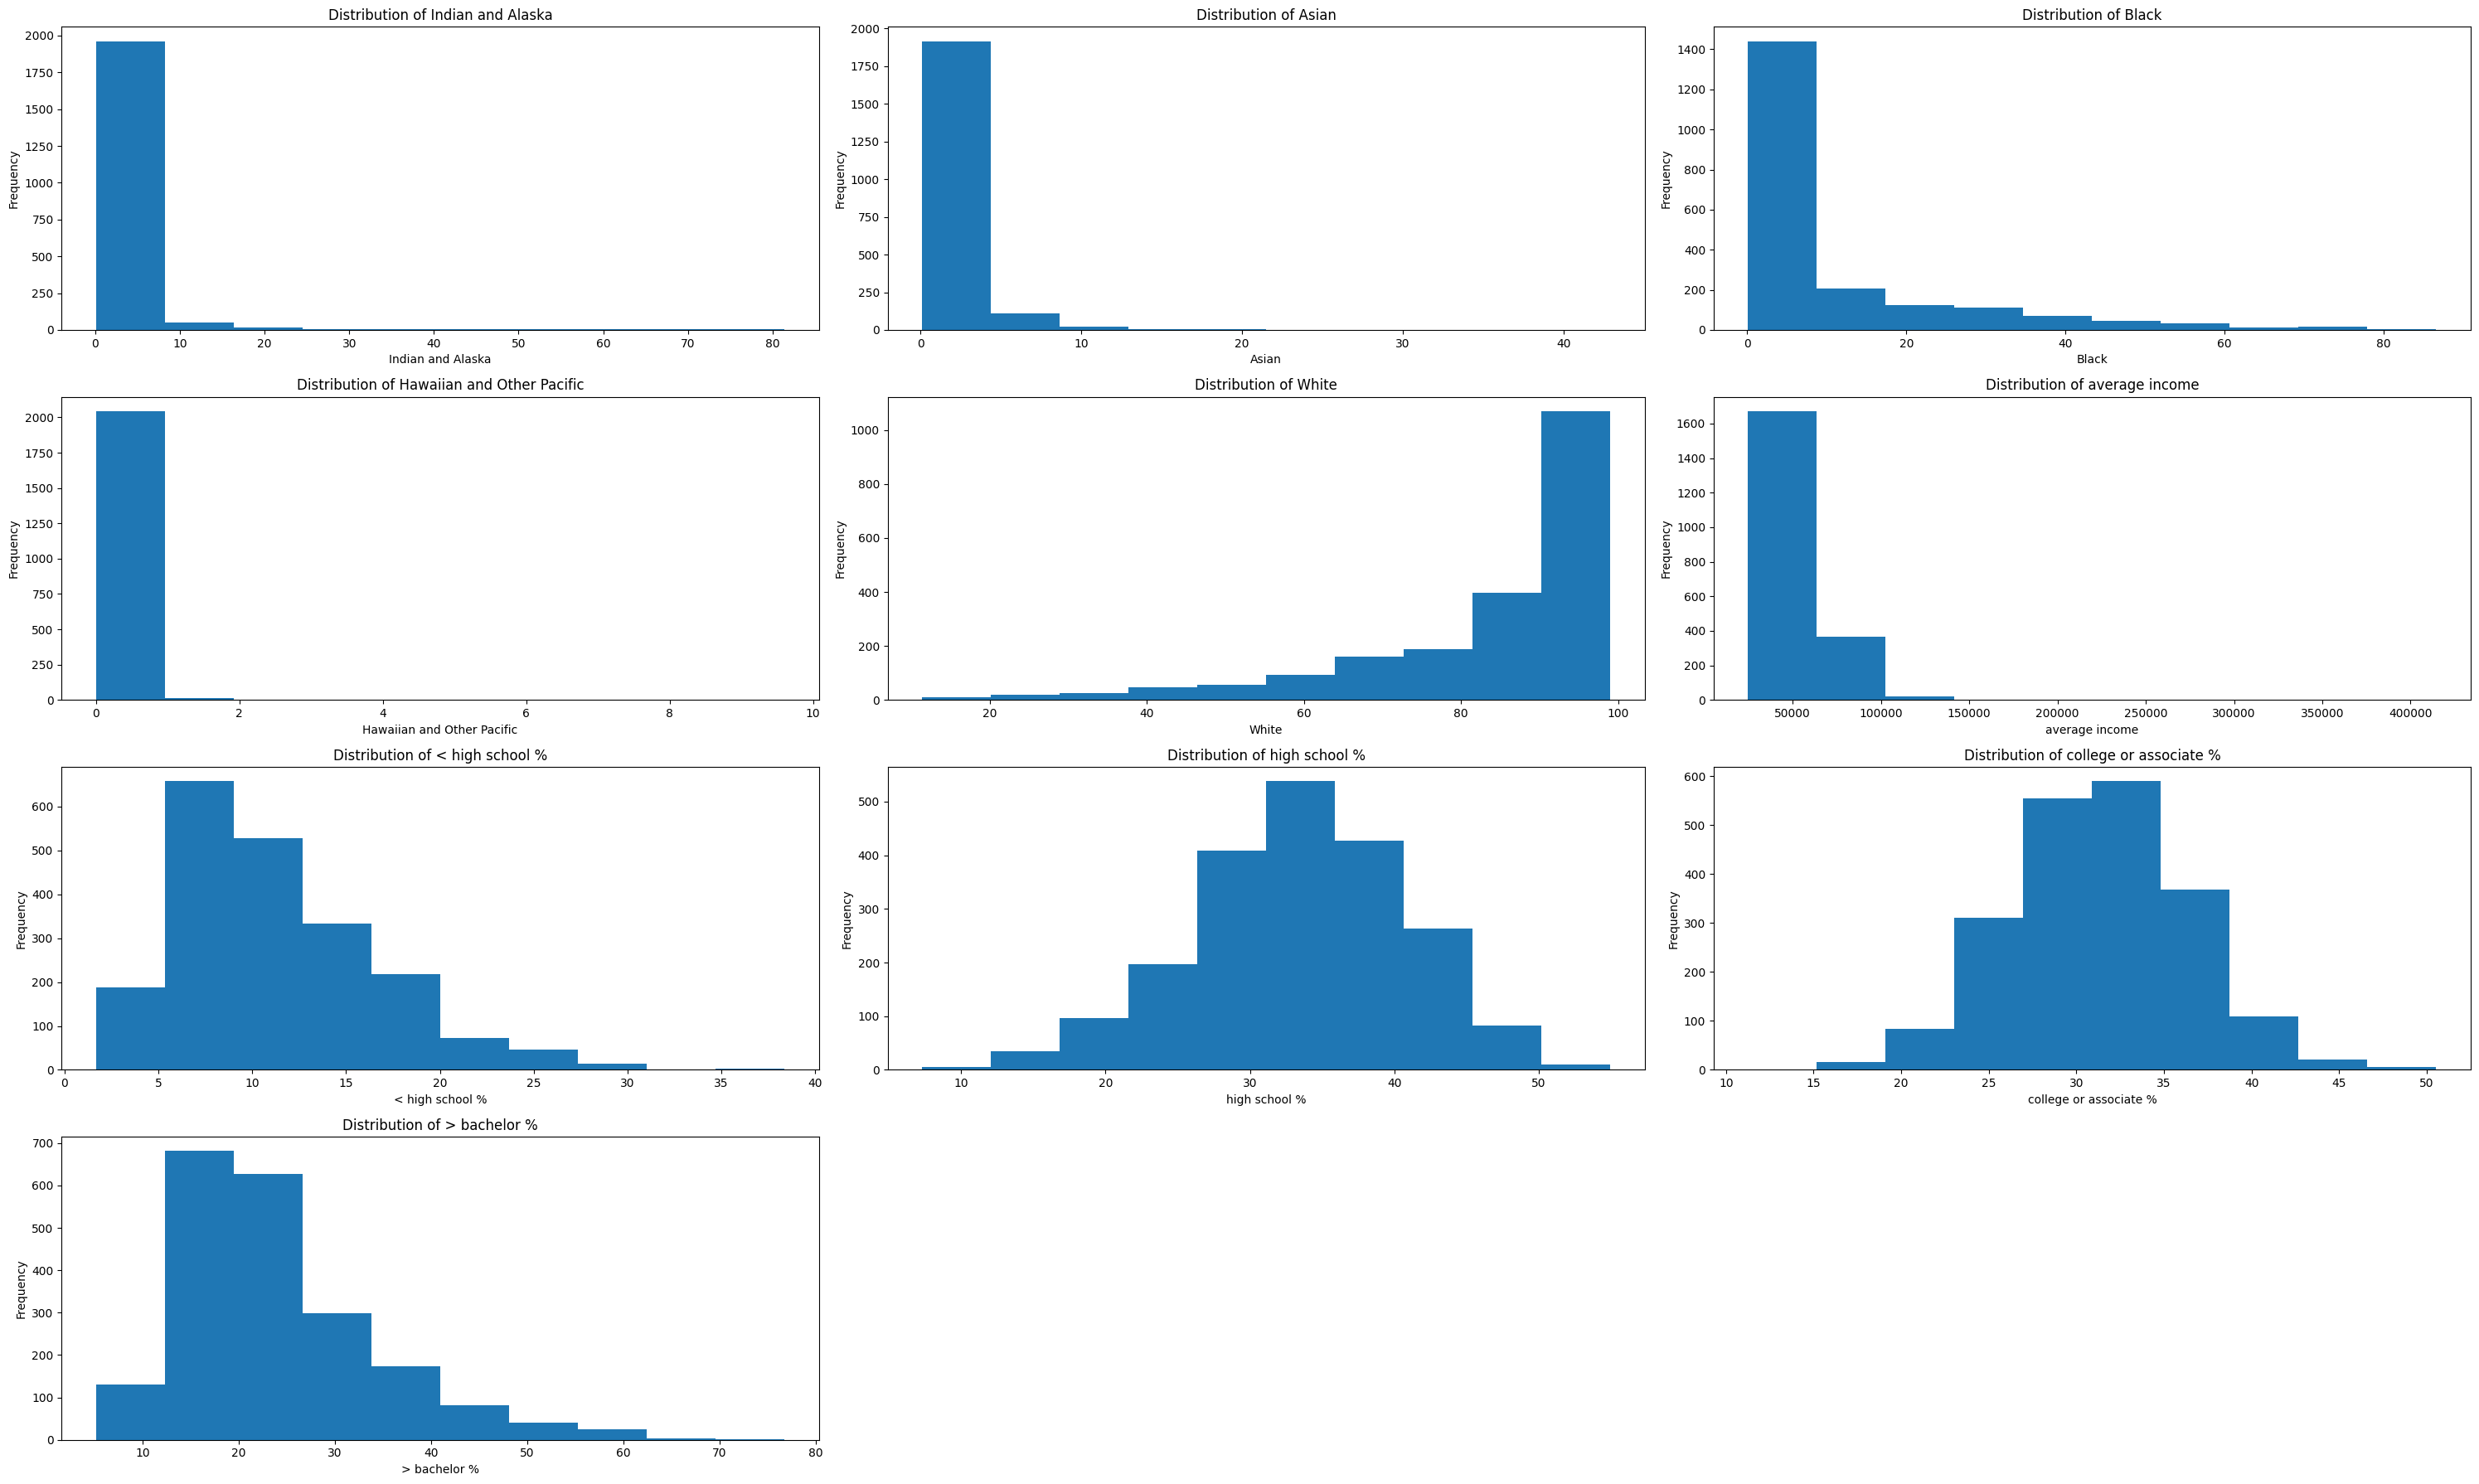

In [73]:
plt.figure(figsize=(30,18))

plt.subplot(4,3,1)
plt.hist(df_reg1['Indian and Alaska'])
plt.title('Distribution of Indian and Alaska')
plt.xlabel('Indian and Alaska')
plt.ylabel('Frequency')

plt.subplot(4,3,2)
plt.hist(df_reg1['Asian'])
plt.title('Distribution of Asian')
plt.xlabel('Asian')
plt.ylabel('Frequency')

plt.subplot(4,3,3)
plt.hist(df_reg1['Black'])
plt.title('Distribution of Black')
plt.xlabel('Black')
plt.ylabel('Frequency')

plt.subplot(4,3,4)
plt.hist(df_reg1['Hawaiian and Other Pacific'])
plt.title('Distribution of Hawaiian and Other Pacific')
plt.xlabel('Hawaiian and Other Pacific')
plt.ylabel('Frequency')

plt.subplot(4,3,5)
plt.hist(df_reg1['White'])
plt.title('Distribution of White')
plt.xlabel('White')
plt.ylabel('Frequency')

plt.subplot(4,3,6)
plt.hist(df_reg1['average income'])
plt.title('Distribution of average income')
plt.xlabel('average income')
plt.ylabel('Frequency')

plt.subplot(4,3,7)
plt.hist(df_reg1['< high school %'])
plt.title('Distribution of < high school %')
plt.xlabel('< high school %')
plt.ylabel('Frequency')

plt.subplot(4,3,8)
plt.hist(df_reg1['high school %'])
plt.title('Distribution of high school %')
plt.xlabel('high school %')
plt.ylabel('Frequency')

plt.subplot(4,3,9)
plt.hist(df_reg1['college or associate %'])
plt.title('Distribution of college or associate %')
plt.xlabel('college or associate %')
plt.ylabel('Frequency')

plt.subplot(4,3,10)
plt.hist(df_reg1['> bachelor %'])
plt.title('Distribution of > bachelor %')
plt.xlabel('> bachelor %')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Conclusion:
* For Race, White are left-skewed and other seems to be right-skewed.
* For Average Income, it looks right-skewed.
* For Education, > bachelor % and < high shcool % seems to be some kind right-skewed.

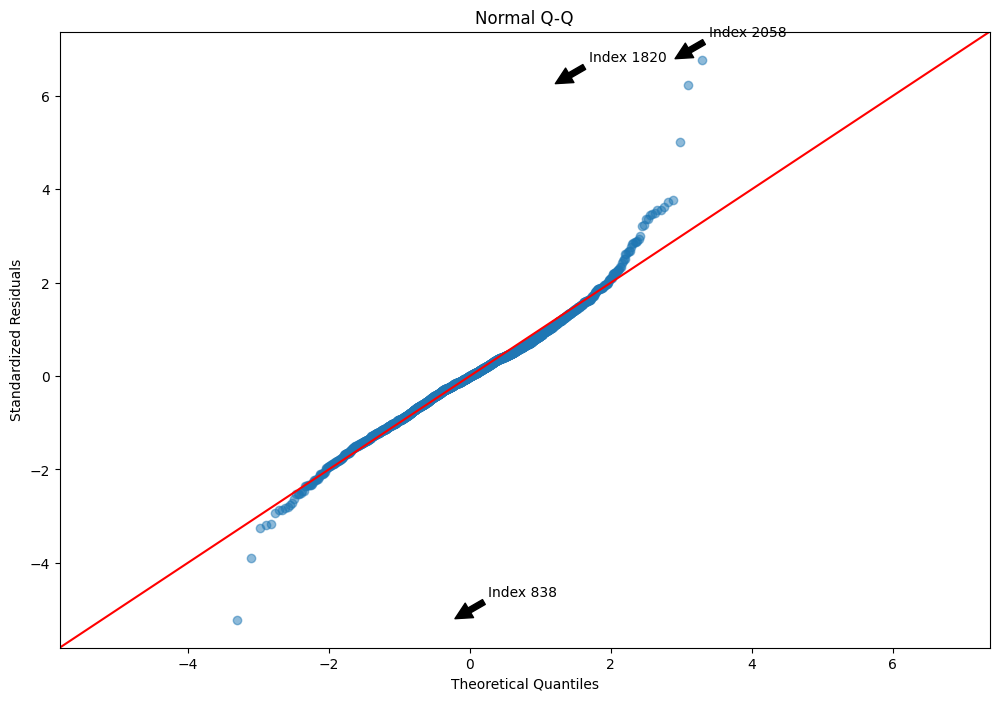

In [74]:
model_fitted_y = model.fittedvalues  # Predicted (fitted) values
model_residuals = model.resid  # Residuals
model_abs_resid = abs(model_residuals)  # Absolute residuals
model_std_residuals = model.get_influence().resid_studentized_internal  # Standardized residuals

# Q-Q plot of standardized residuals
QQ = ProbPlot(model_std_residuals)  
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, lw=1)

# Set figure size and title
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

# Annotate the top 3 largest residuals
# Use standardized residuals to find the largest values
abs_norm_resid = np.flip(np.argsort(np.abs(model_std_residuals)), 0)  # Get indices of largest residuals
abs_norm_resid_top_3 = abs_norm_resid[:3]

# Annotate the top 3 residuals
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(f'Index {i}', 
                               xy=(QQ.theoretical_quantiles[i], model_std_residuals[i]),
                               xytext=(QQ.theoretical_quantiles[i] + 0.5, model_std_residuals[i] + 0.5),
                               arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

Conclusion: 
* The QQ plot shows that even though the some individual variables would violate the normality assumption, the regression model can still satisfy the normality assumption. 

After Transformation

In [75]:
# Log Transfer for right-skewed
df_reg1['log Indian and Alaska'] = np.log(df_reg1['Indian and Alaska'] + 1)
df_reg1['log Asian'] = np.log(df_reg1['Asian'] + 1)
df_reg1['log Black'] = np.log(df_reg1['Black'] + 1)
df_reg1['log Hawaiian and Other Pacific'] = np.log(df_reg1['Hawaiian and Other Pacific'] + 1)
df_reg1['log average income'] = np.log(df_reg1['average income'])
df_reg1['log > bachelor %'] = np.log(df_reg1['> bachelor %'])
df_reg1['log < high school %'] = np.log(df_reg1['< high school %'])

# Another way for treating left-skewed
# reverse the skew
white_reversed = df_reg1['White'].max() + df_reg1['White'].min() - df_reg1['White']

# apply a box-cox transformation
white_transformed, _ = boxcox(white_reversed)

df_reg1['Transformed White'] = white_transformed

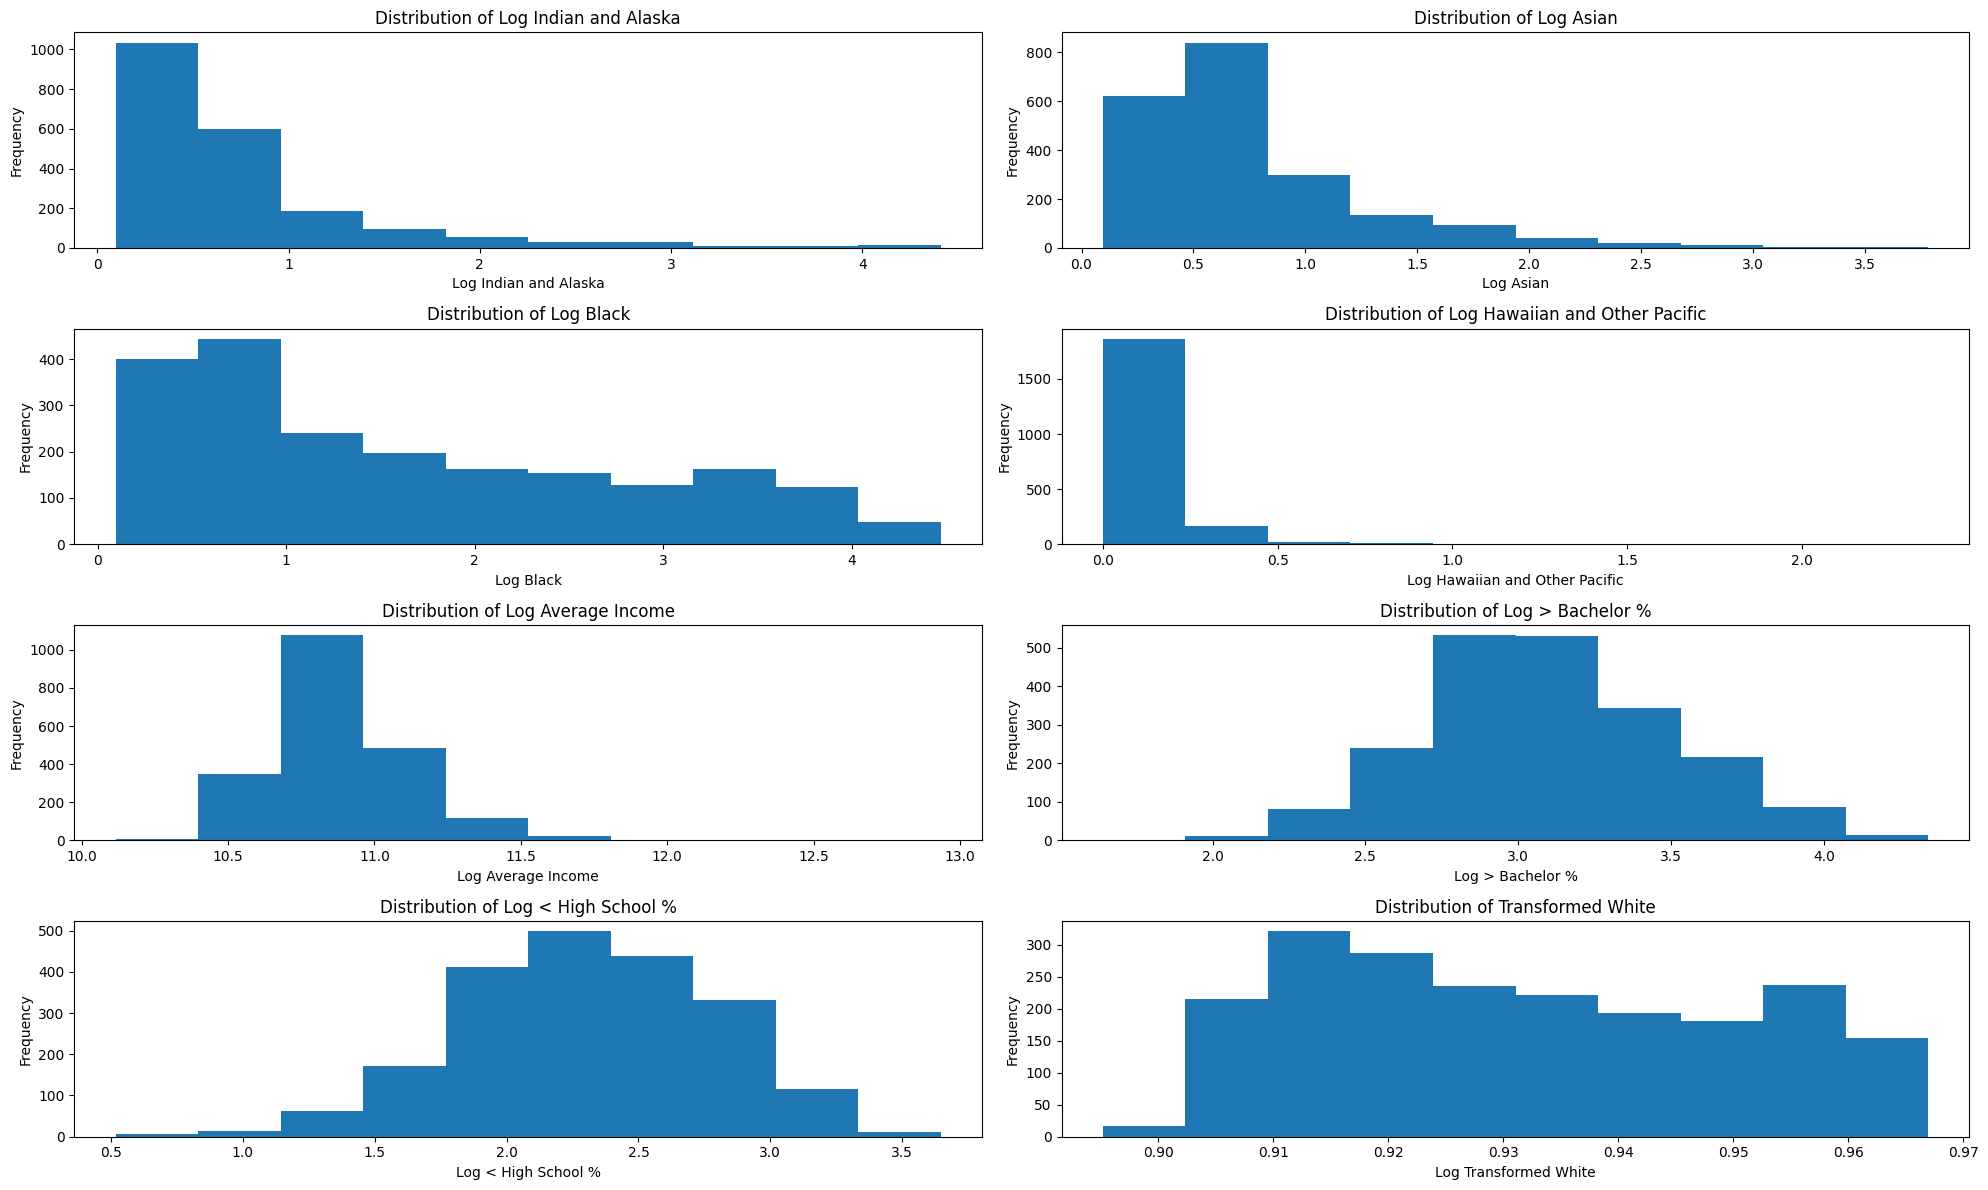

In [76]:
plt.figure(figsize=(20,12))

plt.subplot(4,2,1)
plt.hist(df_reg1['log Indian and Alaska'])
plt.title('Distribution of Log Indian and Alaska')
plt.xlabel('Log Indian and Alaska')
plt.ylabel('Frequency')

plt.subplot(4,2,2)
plt.hist(df_reg1['log Asian'])
plt.title('Distribution of Log Asian')
plt.xlabel('Log Asian')
plt.ylabel('Frequency')

plt.subplot(4,2,3)
plt.hist(df_reg1['log Black'])
plt.title('Distribution of Log Black')
plt.xlabel('Log Black')
plt.ylabel('Frequency')

plt.subplot(4,2,4)
plt.hist(df_reg1['log Hawaiian and Other Pacific'])
plt.title('Distribution of Log Hawaiian and Other Pacific')
plt.xlabel('Log Hawaiian and Other Pacific')
plt.ylabel('Frequency')

plt.subplot(4,2,5)
plt.hist(df_reg1['log average income'])
plt.title('Distribution of Log Average Income')
plt.xlabel('Log Average Income')
plt.ylabel('Frequency')

plt.subplot(4,2,6)
plt.hist(df_reg1['log > bachelor %'])
plt.title('Distribution of Log > Bachelor %')
plt.xlabel('Log > Bachelor %')
plt.ylabel('Frequency')

plt.subplot(4,2,7)
plt.hist(df_reg1['log < high school %'])
plt.title('Distribution of Log < High School %')
plt.xlabel('Log < High School %')
plt.ylabel('Frequency')

plt.subplot(4,2,8)
plt.hist(df_reg1['Transformed White'])
plt.title('Distribution of Transformed White')
plt.xlabel('Log Transformed White')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Conclusion:
* For Race: those right-skewed variables seem to be too right-skewed, even after log transforming, they still show the right-skewed tendency. After transforming White shows some kind normality here.
* For Income and Education, after transforming, all show the normality.

#### 1.4.3.2 Linearity

Raw Data

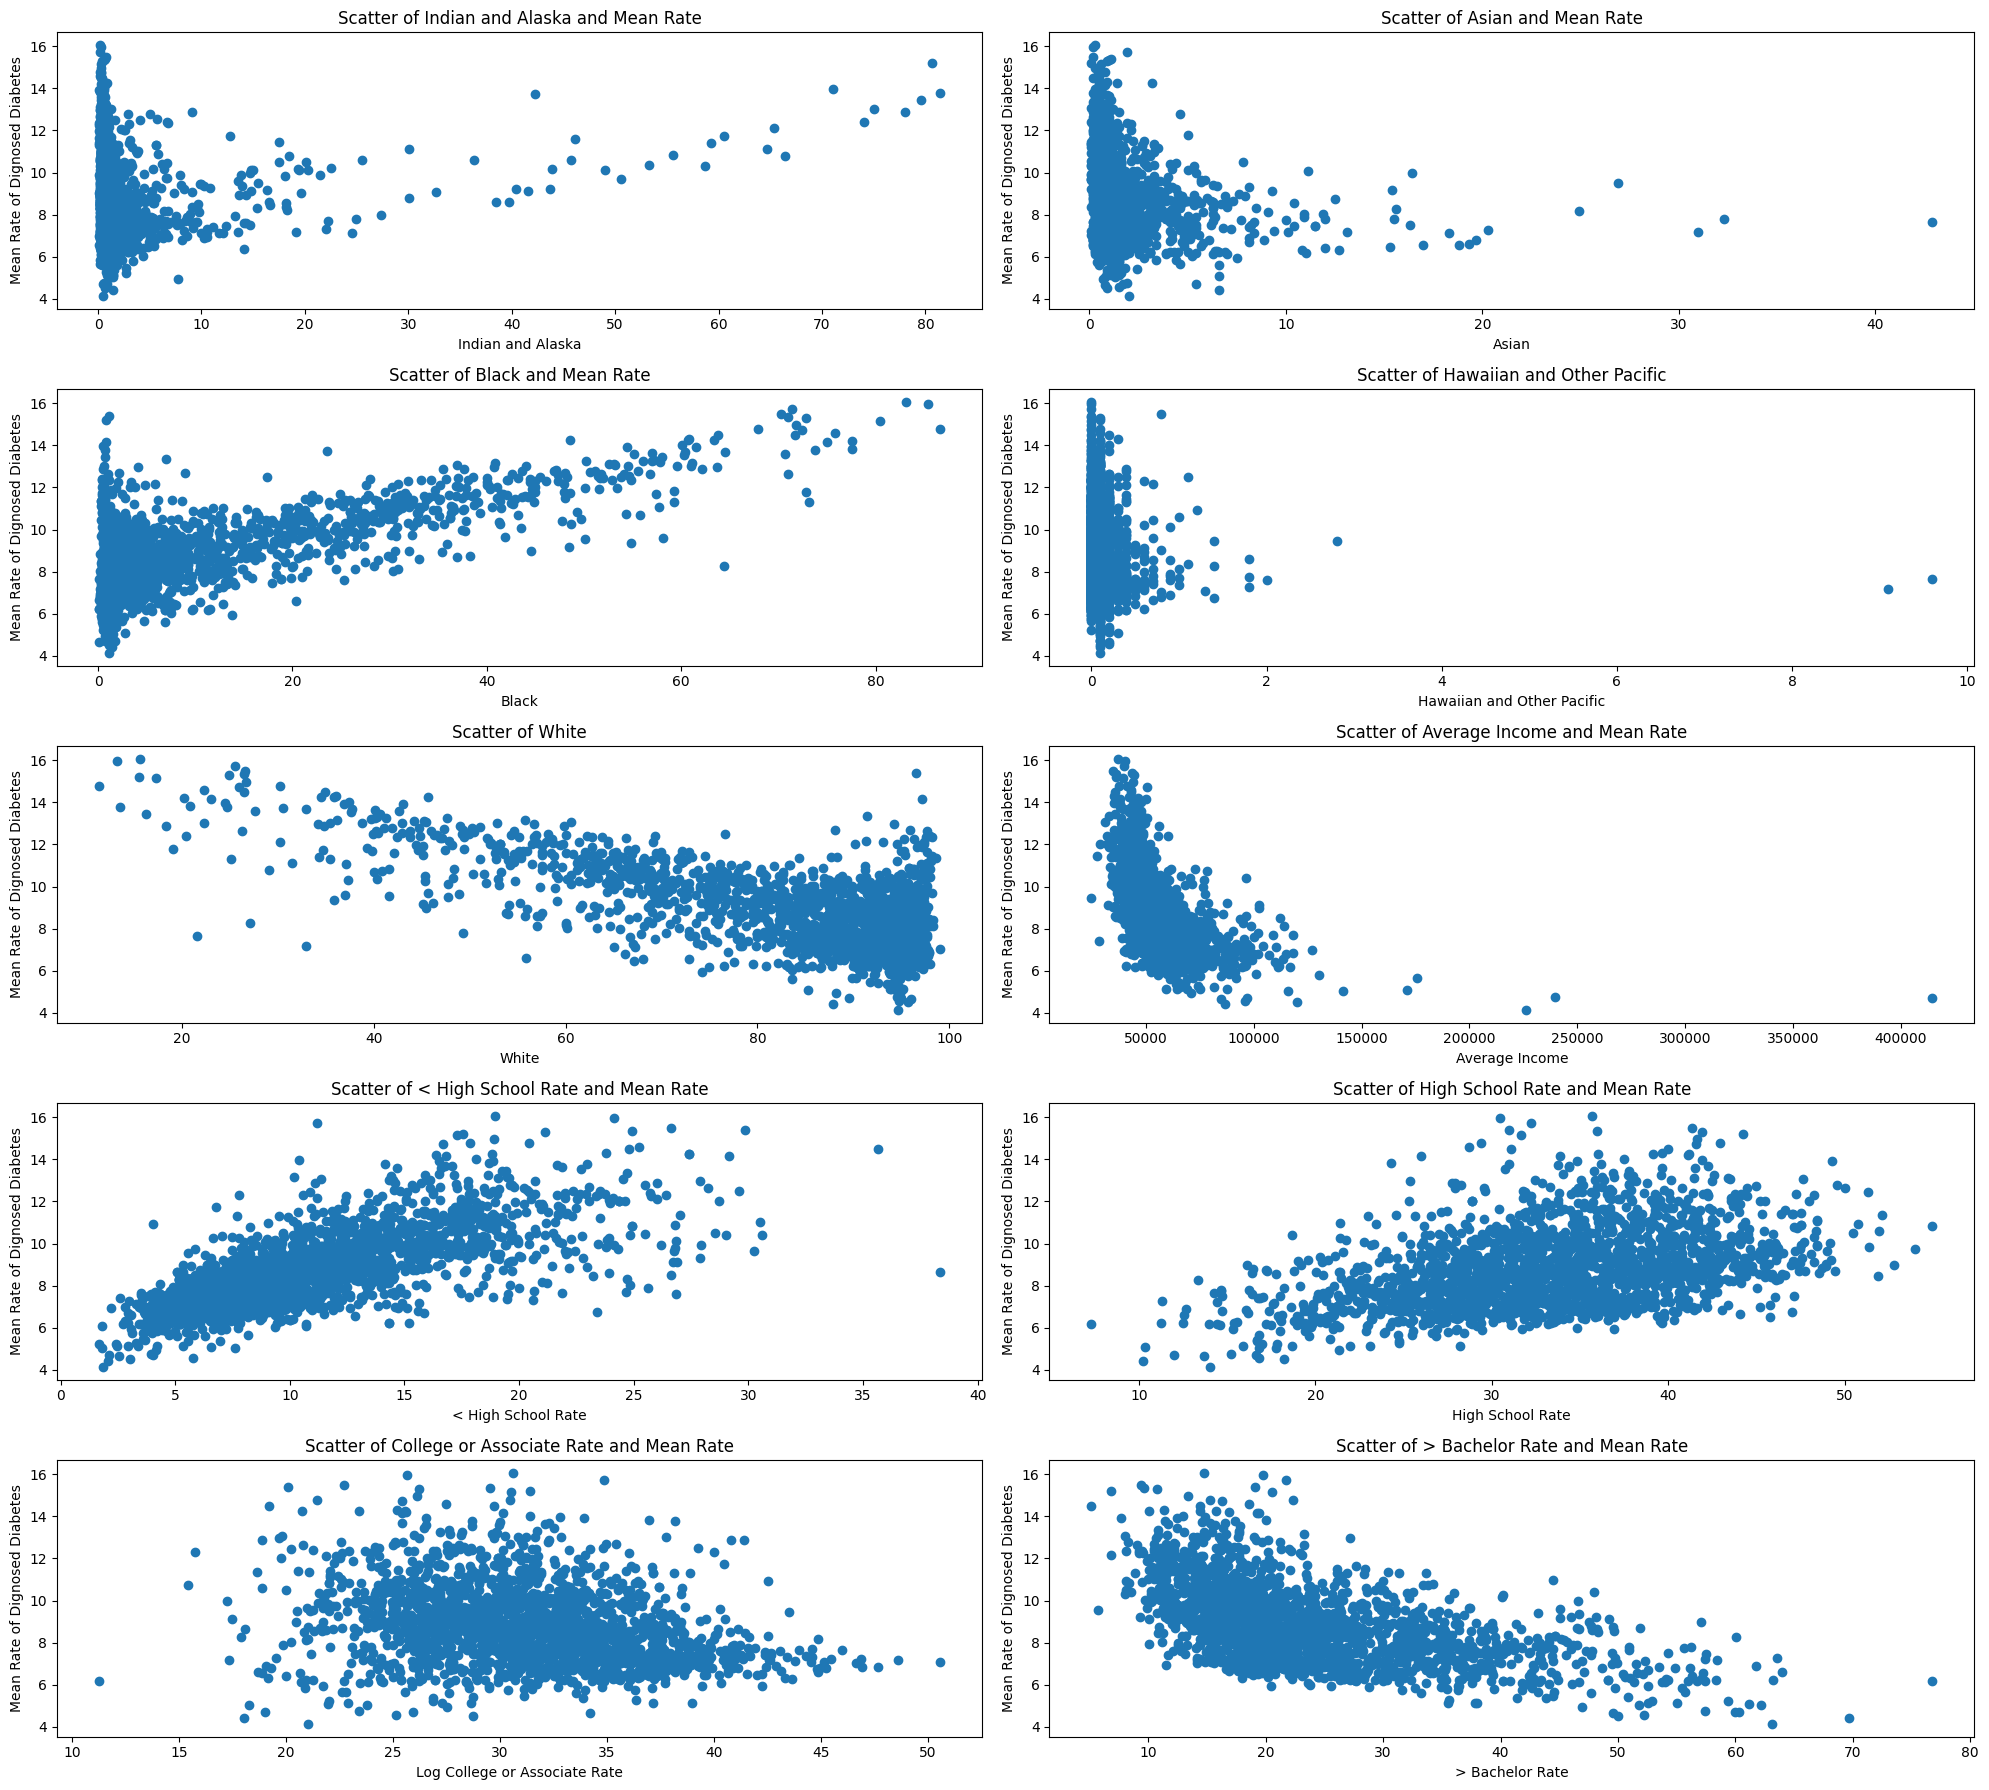

In [77]:
plt.figure(figsize=(20,18))

plt.subplot(5,2,1)
plt.scatter(df_reg1['Indian and Alaska'], df_reg1['mean rate'])
plt.title('Scatter of Indian and Alaska and Mean Rate')
plt.xlabel('Indian and Alaska')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,2)
plt.scatter(df_reg1['Asian'], df_reg1['mean rate'])
plt.title('Scatter of Asian and Mean Rate')
plt.xlabel('Asian')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,3)
plt.scatter(df_reg1['Black'], df_reg1['mean rate'])
plt.title('Scatter of Black and Mean Rate')
plt.xlabel('Black')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,4)
plt.scatter(df_reg1['Hawaiian and Other Pacific'], df_reg1['mean rate'])
plt.title('Scatter of Hawaiian and Other Pacific')
plt.xlabel('Hawaiian and Other Pacific')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,5)
plt.scatter(df_reg1['White'], df_reg1['mean rate'])
plt.title('Scatter of White')
plt.xlabel('White')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,6)
plt.scatter(df_reg1['average income'], df_reg1['mean rate'])
plt.title('Scatter of Average Income and Mean Rate')
plt.xlabel('Average Income')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,7)
plt.scatter(df_reg1['< high school %'], df_reg1['mean rate'])
plt.title('Scatter of < High School Rate and Mean Rate')
plt.xlabel('< High School Rate')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,8)
plt.scatter(df_reg1['high school %'], df_reg1['mean rate'])
plt.title('Scatter of High School Rate and Mean Rate')
plt.xlabel('High School Rate')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,9)
plt.scatter(df_reg1['college or associate %'], df_reg1['mean rate'])
plt.title('Scatter of College or Associate Rate and Mean Rate')
plt.xlabel('Log College or Associate Rate')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,10)
plt.scatter(df_reg1['> bachelor %'], df_reg1['mean rate'])
plt.title('Scatter of > Bachelor Rate and Mean Rate')
plt.xlabel('> Bachelor Rate')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.tight_layout()
plt.show()

Conclusion: 
* For Race, the linearity is not obvious.
* For Income, it shows the linearity here.
* For Education, except College or Assocaite Rate, other variables all shows some kind of linearity here.

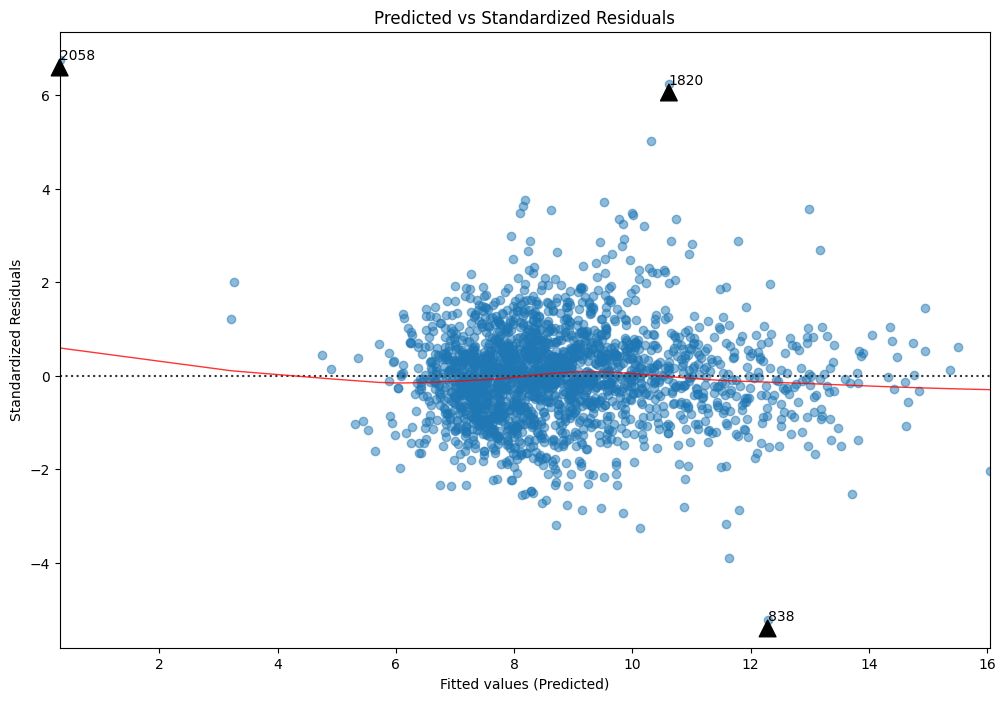

In [78]:
# Create the plot
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# Residuals vs Fitted plot
sns.residplot(x=model_fitted_y, y=model_std_residuals, 
              lowess=True, 
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.title('Predicted vs Standardized Residuals')
plt.xlabel('Fitted values (Predicted)')
plt.ylabel('Standardized Residuals')

# Annotate the top 3 largest residuals
abs_resid_top_3 = model_abs_resid.sort_values(ascending=False)[:3]

for i in abs_resid_top_3.index:
    plt.annotate(i, 
                 xy=(model_fitted_y[i], model_std_residuals[i]),
                 xytext=(model_fitted_y[i], model_std_residuals[i]),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()


Conclusion:
* The Residual Plot shows that the model could not pass the linearity assumption.

After Transformation

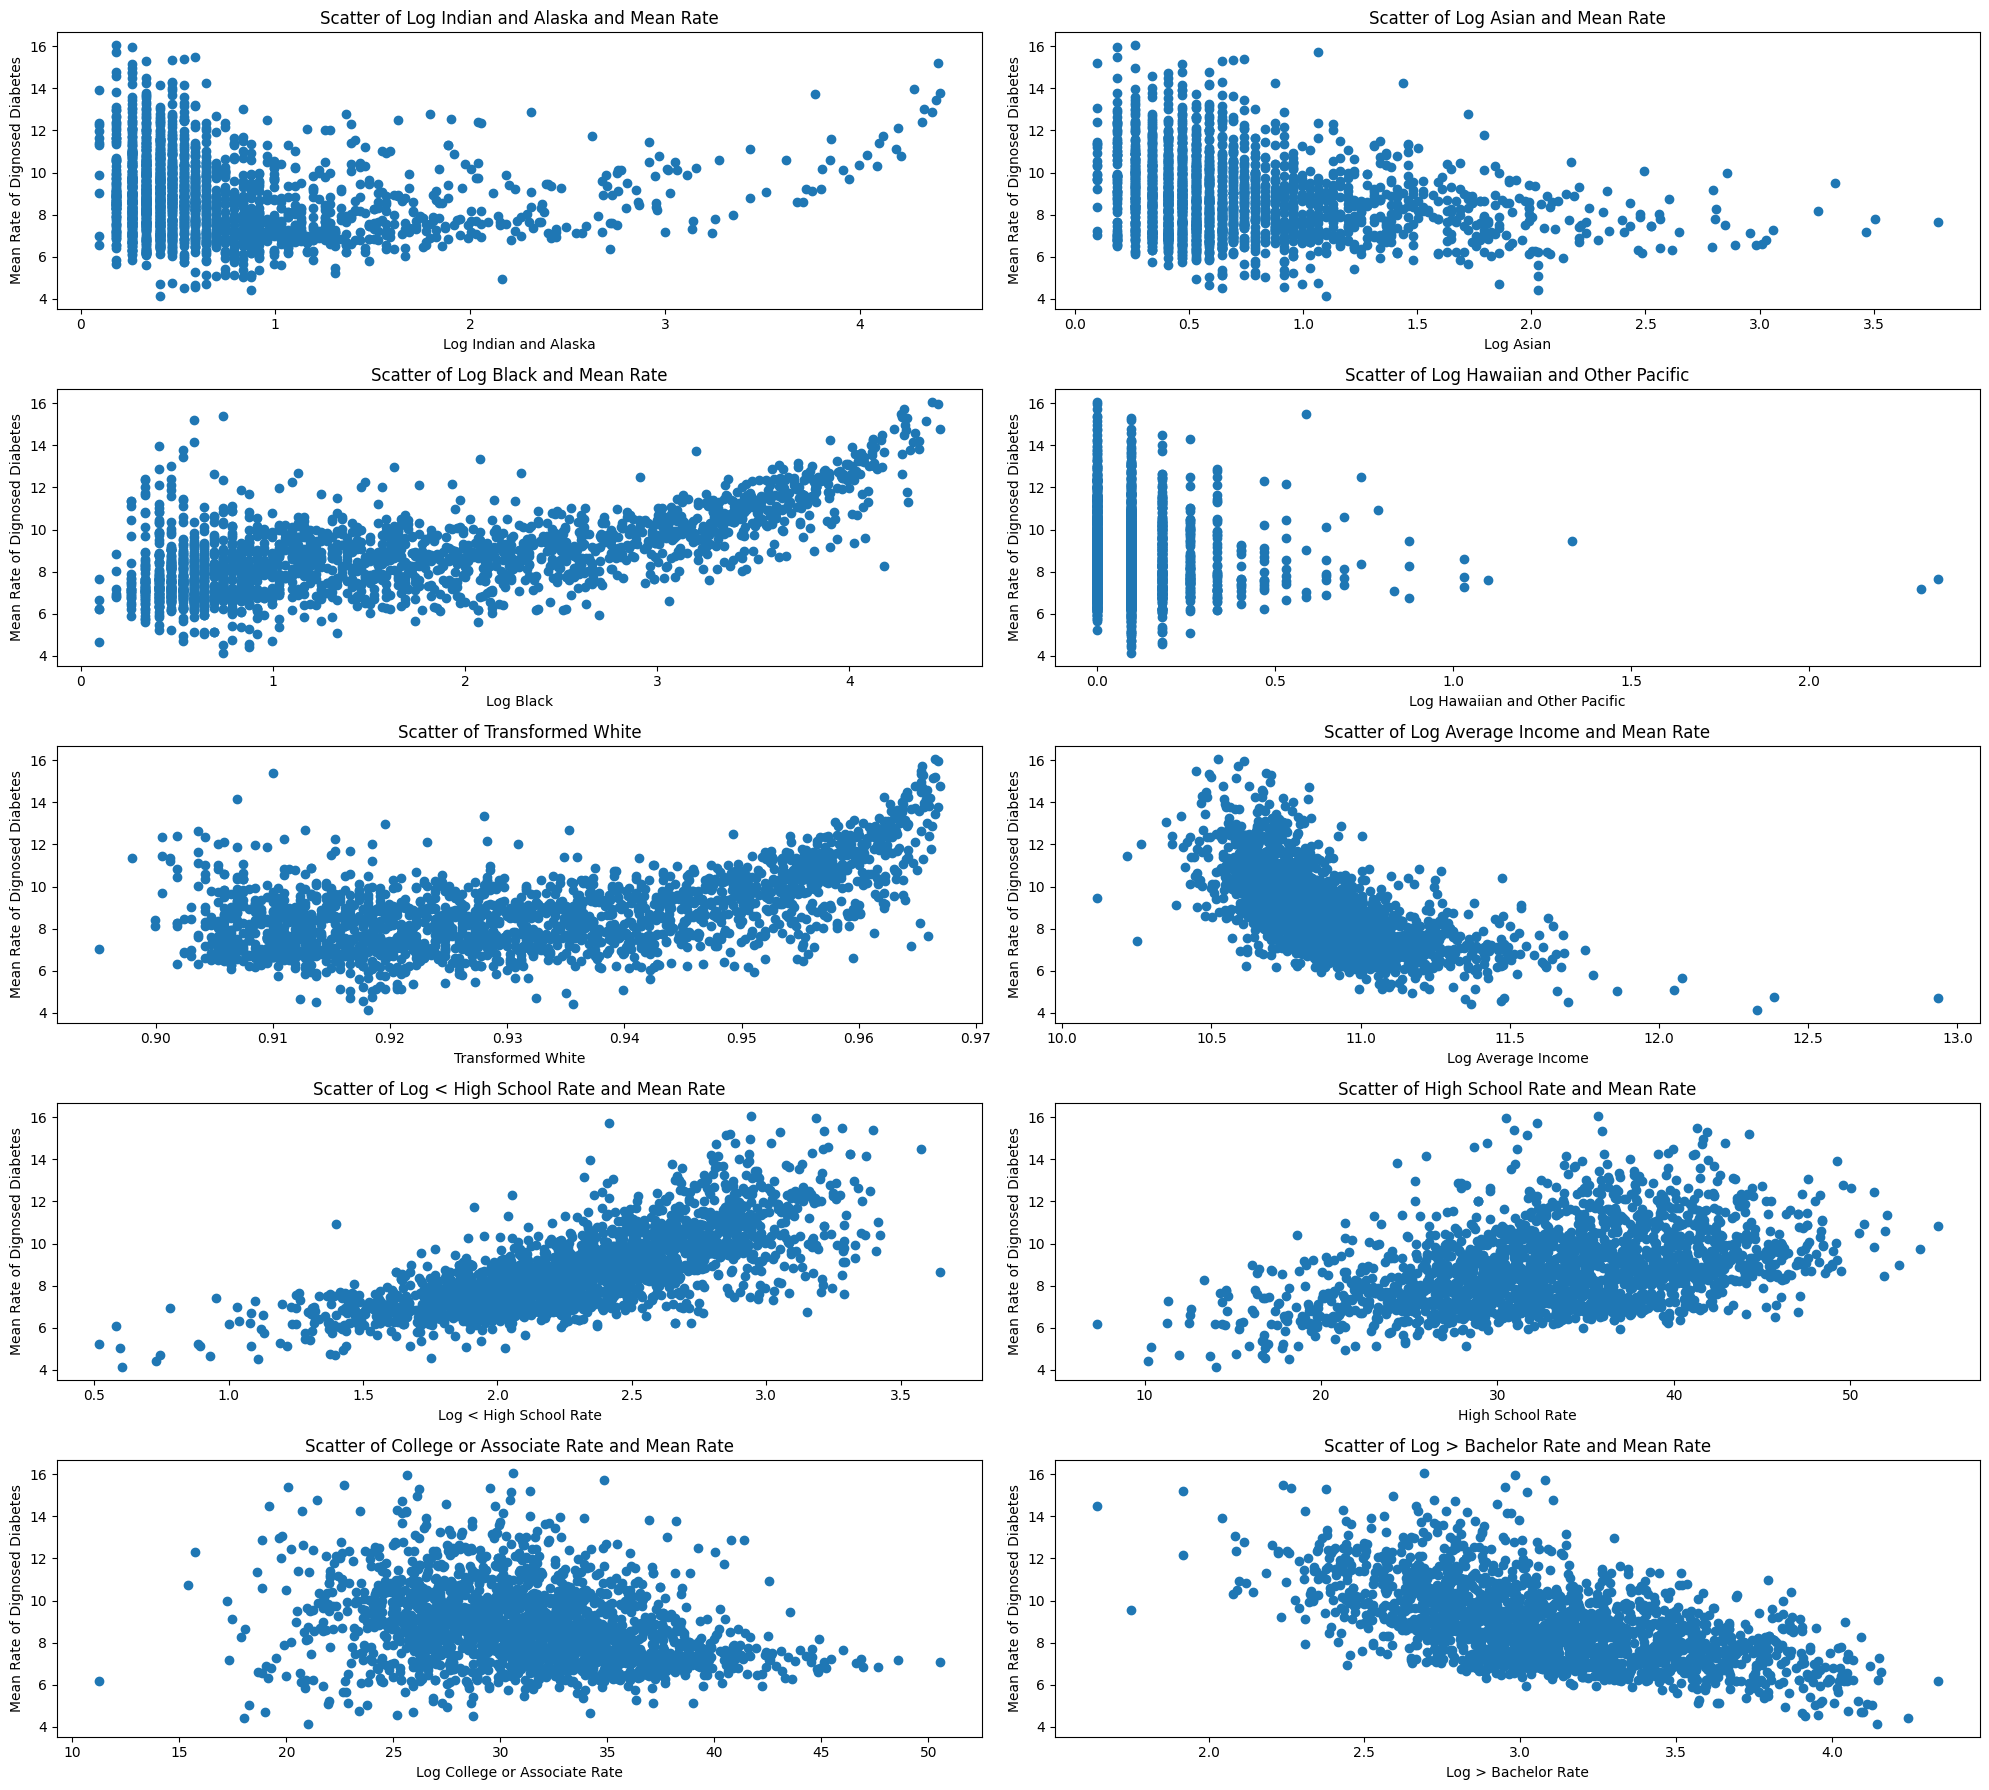

In [79]:
plt.figure(figsize=(20,18))

plt.subplot(5,2,1)
plt.scatter(df_reg1['log Indian and Alaska'], df_reg1['mean rate'])
plt.title('Scatter of Log Indian and Alaska and Mean Rate')
plt.xlabel('Log Indian and Alaska')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,2)
plt.scatter(df_reg1['log Asian'], df_reg1['mean rate'])
plt.title('Scatter of Log Asian and Mean Rate')
plt.xlabel('Log Asian')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,3)
plt.scatter(df_reg1['log Black'], df_reg1['mean rate'])
plt.title('Scatter of Log Black and Mean Rate')
plt.xlabel('Log Black')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,4)
plt.scatter(df_reg1['log Hawaiian and Other Pacific'], df_reg1['mean rate'])
plt.title('Scatter of Log Hawaiian and Other Pacific')
plt.xlabel('Log Hawaiian and Other Pacific')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,5)
plt.scatter(df_reg1['Transformed White'], df_reg1['mean rate'])
plt.title('Scatter of Transformed White')
plt.xlabel('Transformed White')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,6)
plt.scatter(df_reg1['log average income'], df_reg1['mean rate'])
plt.title('Scatter of Log Average Income and Mean Rate')
plt.xlabel('Log Average Income')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,7)
plt.scatter(df_reg1['log < high school %'], df_reg1['mean rate'])
plt.title('Scatter of Log < High School Rate and Mean Rate')
plt.xlabel('Log < High School Rate')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,8)
plt.scatter(df_reg1['high school %'], df_reg1['mean rate'])
plt.title('Scatter of High School Rate and Mean Rate')
plt.xlabel('High School Rate')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,9)
plt.scatter(df_reg1['college or associate %'], df_reg1['mean rate'])
plt.title('Scatter of College or Associate Rate and Mean Rate')
plt.xlabel('Log College or Associate Rate')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.subplot(5,2,10)
plt.scatter(df_reg1['log > bachelor %'], df_reg1['mean rate'])
plt.title('Scatter of Log > Bachelor Rate and Mean Rate')
plt.xlabel('Log > Bachelor Rate')
plt.ylabel('Mean Rate of Dignosed Diabetes')

plt.tight_layout()
plt.show()

#### 1.4.3.3 Multicollinearity

In [80]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/Users/cherongtian/Desktop/python/.venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/cherongtian/Desktop/python/.venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,const,0.000000
1,Indian and Alaska,74.953440
2,Asian,12.174723
3,Black,288.827169
4,Hawaiian and Other Pacific,2.632683
5,White,339.175732
6,average income,1.658926
7,< high school %,inf
8,high school %,inf
9,college or associate %,inf


Conclusion:
* Before the transformation, Race and Education shows high Collinearity here and we should drop at least one of them.

In [81]:
X_drop = df_reg1[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'average income', 
             '< high school %','high school %', '> bachelor %']]
# drop White and College or Associate rate here
vif_data = pd.DataFrame()
vif_data["Variable"] = X_drop.columns
vif_data["VIF"] = [variance_inflation_factor(X_drop.values, i) for i in range(X_drop.shape[1])]
vif_data

,Variable,VIF
0,Indian and Alaska,1.126420
1,Asian,2.699922
2,Black,1.809992
3,Hawaiian and Other Pacific,1.562654
4,average income,17.871933
5,< high school %,8.255098
6,high school %,13.180965
7,> bachelor %,13.839442


Conclusion: 
* After dropping White for Race and college or associate % for Education, those variables for Race do not show collinearity but other variables still show the collinearity.
* The VIF for average income switch from 1.66 to 17.87, indicating that after dropping the 2 variables, average income shows some collinearity with other variables.

#### 1.4.3.4 Constant Variance

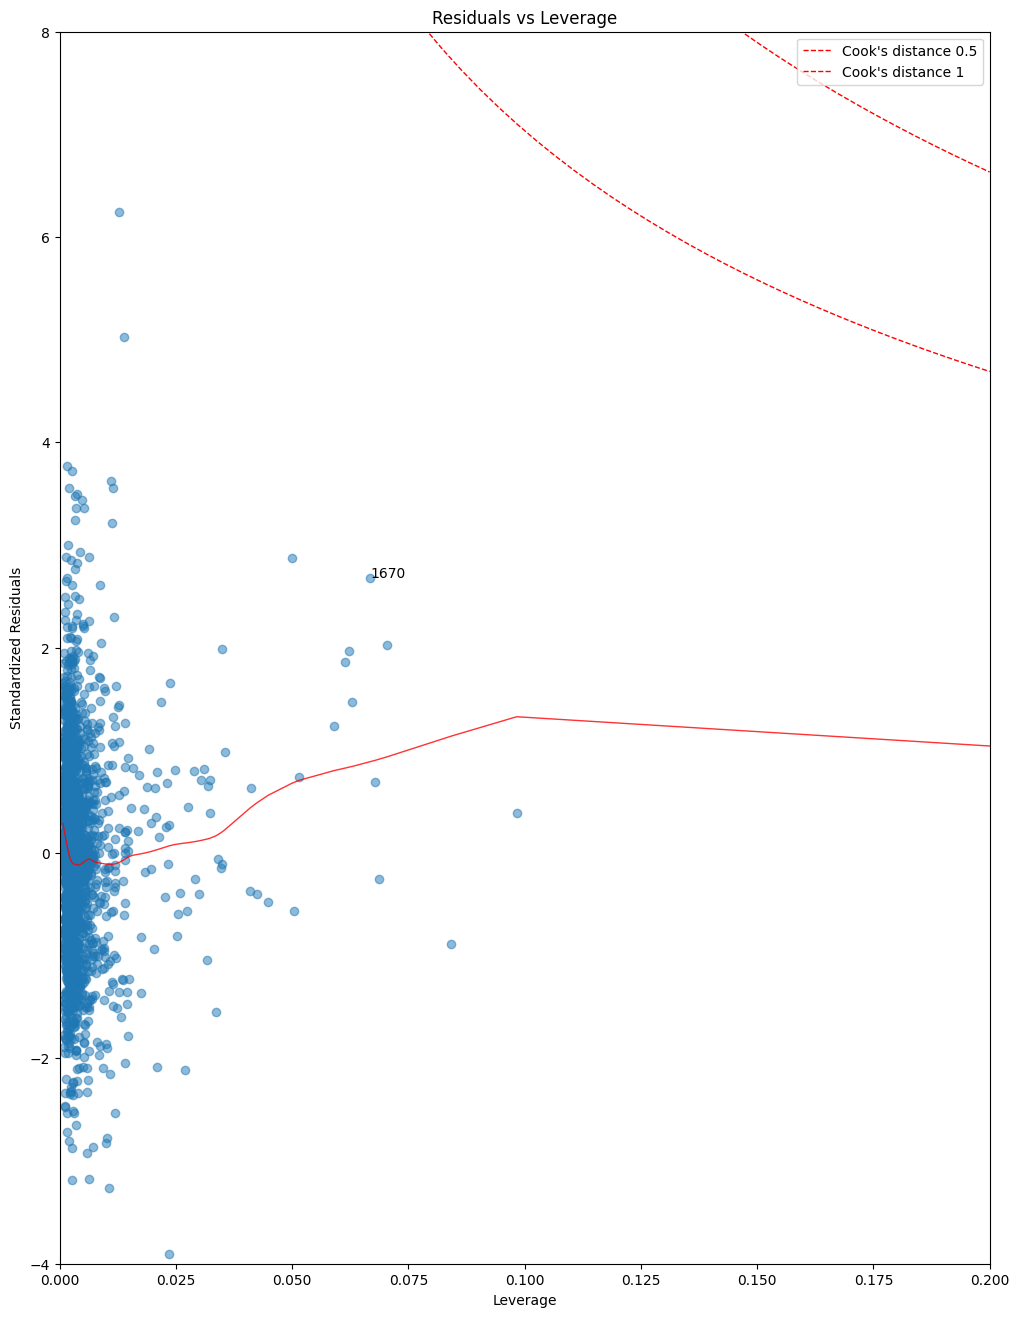

In [82]:
influence = model.get_influence()
model_leverage = influence.hat_matrix_diag
model_norm_residuals = influence.resid_studentized_internal
model_cooks = influence.cooks_distance[0]

# Create the leverage plot as described
plot_lm_4 = plt.figure(1)
plot_lm_4.set_figheight(16)
plot_lm_4.set_figwidth(12)

# Scatter plot for leverage vs residuals
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)

# Use sns.regplot to add a lowess line (fit is False for regplot to avoid conflict)
sns.regplot(x=model_leverage, y=model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.2)
plot_lm_4.axes[0].set_ylim(-4, 8)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# Annotations for the top 3 leverage points
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# Function for Cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model.params)  # Number of parameters in the model

# Plot Cook's distance contours
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance 0.5')

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance 1')

plt.legend(loc='upper right')

# Show the plot
plt.show()

Conclusion:
* There is no plot above the Cook's Distance 1, showing there is no influencial outliers.

#### 1.4.3.5 Independence

In [83]:
# Durbin-Watson test
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 1.434335333804178


Conclusion:
* DW statistic 1.434 suggests positive autocorrelation in the residuals, as the value is below 2 but above 1, which could indicate that:
1. Residuals are not independent.
2. Observations may have a temporal or spatial structure.

#### 1.4.3.6 Assumption Check Conclusion for First Regression before Transformation

1. Normality: Even some variables cannot satisfy the normality, but the QQ plot shows that the model could satisfy the normality assumption.
2. Linearty: Almost half of the variables could not satisfy the linearity assumption and the residual plot shows that the model could not satisfy the linearity assumption.
3. Multicollinearity: The VIF shows that variables for race and education cannot satisfy the multicollinearity assumption and we should drop one of them for each and recheck. But after dropping, the situation seems to become more complicated.
4. Constant Variance: Since there is no plot above the Cook's Distance 1 line, there are no influencial outliers.
5. Independence: The DW statistic is about 1.43, which is a little bit from 2 (ideal number).

### 1.4.4 Model Adjustment

#### 1.4.4.1 Log Transform Average Income

In [84]:
X_log = df_reg1[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White',
                'log average income', '< high school %','high school %', 'college or associate %',
                '> bachelor %']]

y = df_reg1['mean rate']

X_log = sm.add_constant(X_log)
model_log = sm.OLS(y, X_log).fit()

print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:              mean rate   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:33:47   Log-Likelihood:                -2335.7
No. Observations:                2062   AIC:                             4691.
Df Residuals:                    2052   BIC:                             4748.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Conclusion:
* Coefficient for log average income looks more reasonable, showing that our guess above should be correct.
* R-squared increases and AIC & BIC decreases some kind, showing that after transformation, the goodness of fit for the model improves.

#### 1.4.4.2 Recheck Multicollinearity

According to previous work, we still need to drop one variables for both Race and Education even if we have done the log transformation for average income.

In [85]:
X_log_drop = df_reg1[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'log average income', 
                      '< high school %','high school %', '> bachelor %']]
# drop White and College or Associate rate here
vif_data = pd.DataFrame()
vif_data["Variable"] = X_log_drop.columns
vif_data["VIF"] = [variance_inflation_factor(X_log_drop.values, i) for i in range(X_log_drop.shape[1])]
vif_data

,Variable,VIF
0,Indian and Alaska,1.151039
1,Asian,2.834749
2,Black,1.784911
3,Hawaiian and Other Pacific,1.639838
4,log average income,214.301381
5,< high school %,11.377964
6,high school %,70.484054
7,> bachelor %,42.007673


Conclusion:
* After log transformation, there is still strong collinearity among variables for Income and Education.

#### 1.4.4.3 Recheck Normality

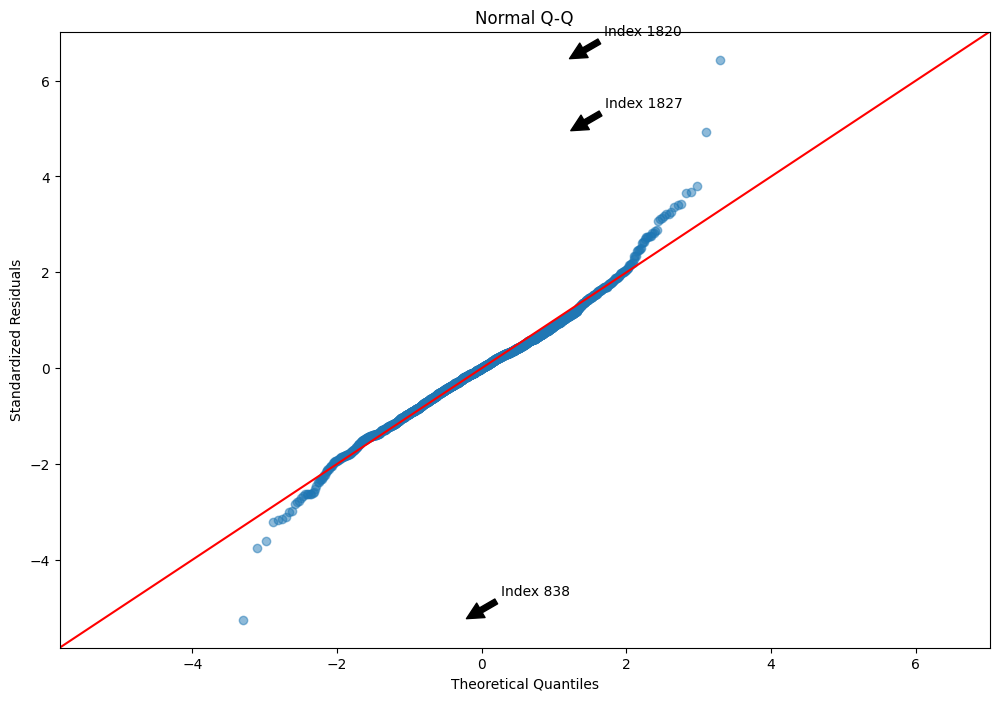

In [86]:
model_fitted_y = model_log.fittedvalues  # Predicted (fitted) values
model_residuals = model_log.resid  # Residuals
model_abs_resid = abs(model_residuals)  # Absolute residuals
model_std_residuals = model_log.get_influence().resid_studentized_internal  # Standardized residuals

# Q-Q plot of standardized residuals
QQ = ProbPlot(model_std_residuals)  
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, lw=1)

# Set figure size and title
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

# Annotate the top 3 largest residuals
# Use standardized residuals to find the largest values
abs_norm_resid = np.flip(np.argsort(np.abs(model_std_residuals)), 0)  # Get indices of largest residuals
abs_norm_resid_top_3 = abs_norm_resid[:3]

# Annotate the top 3 residuals
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(f'Index {i}', 
                               xy=(QQ.theoretical_quantiles[i], model_std_residuals[i]),
                               xytext=(QQ.theoretical_quantiles[i] + 0.5, model_std_residuals[i] + 0.5),
                               arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

Conclusion:
* According to the QQ plot, the model could still satisfy the normality assumption

#### 1.4.4.4 Recheck Linearity

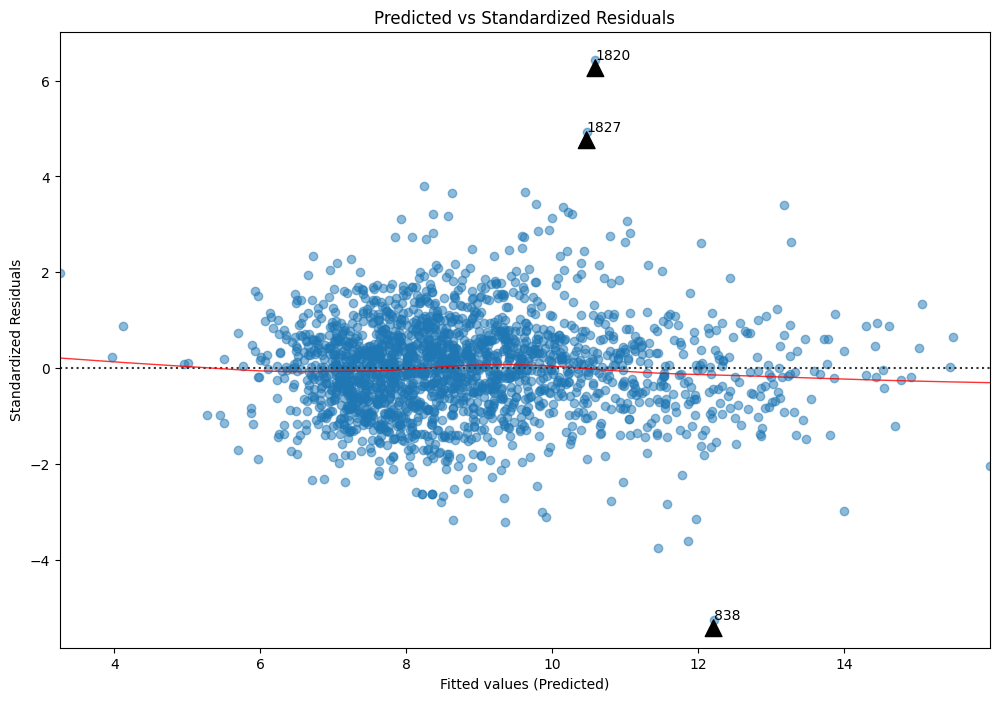

In [87]:
# Create the plot
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# Residuals vs Fitted plot
sns.residplot(x=model_fitted_y, y=model_std_residuals, 
              lowess=True, 
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.title('Predicted vs Standardized Residuals')
plt.xlabel('Fitted values (Predicted)')
plt.ylabel('Standardized Residuals')

# Annotate the top 3 largest residuals
abs_resid_top_3 = model_abs_resid.sort_values(ascending=False)[:3]

for i in abs_resid_top_3.index:
    plt.annotate(i, 
                 xy=(model_fitted_y[i], model_std_residuals[i]),
                 xytext=(model_fitted_y[i], model_std_residuals[i]),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()


Conclusion:
* After log transformation average income, the model seems still cannot satisfy the linearity assumption.

#### 1.4.4.5 Recheck Constance Variance

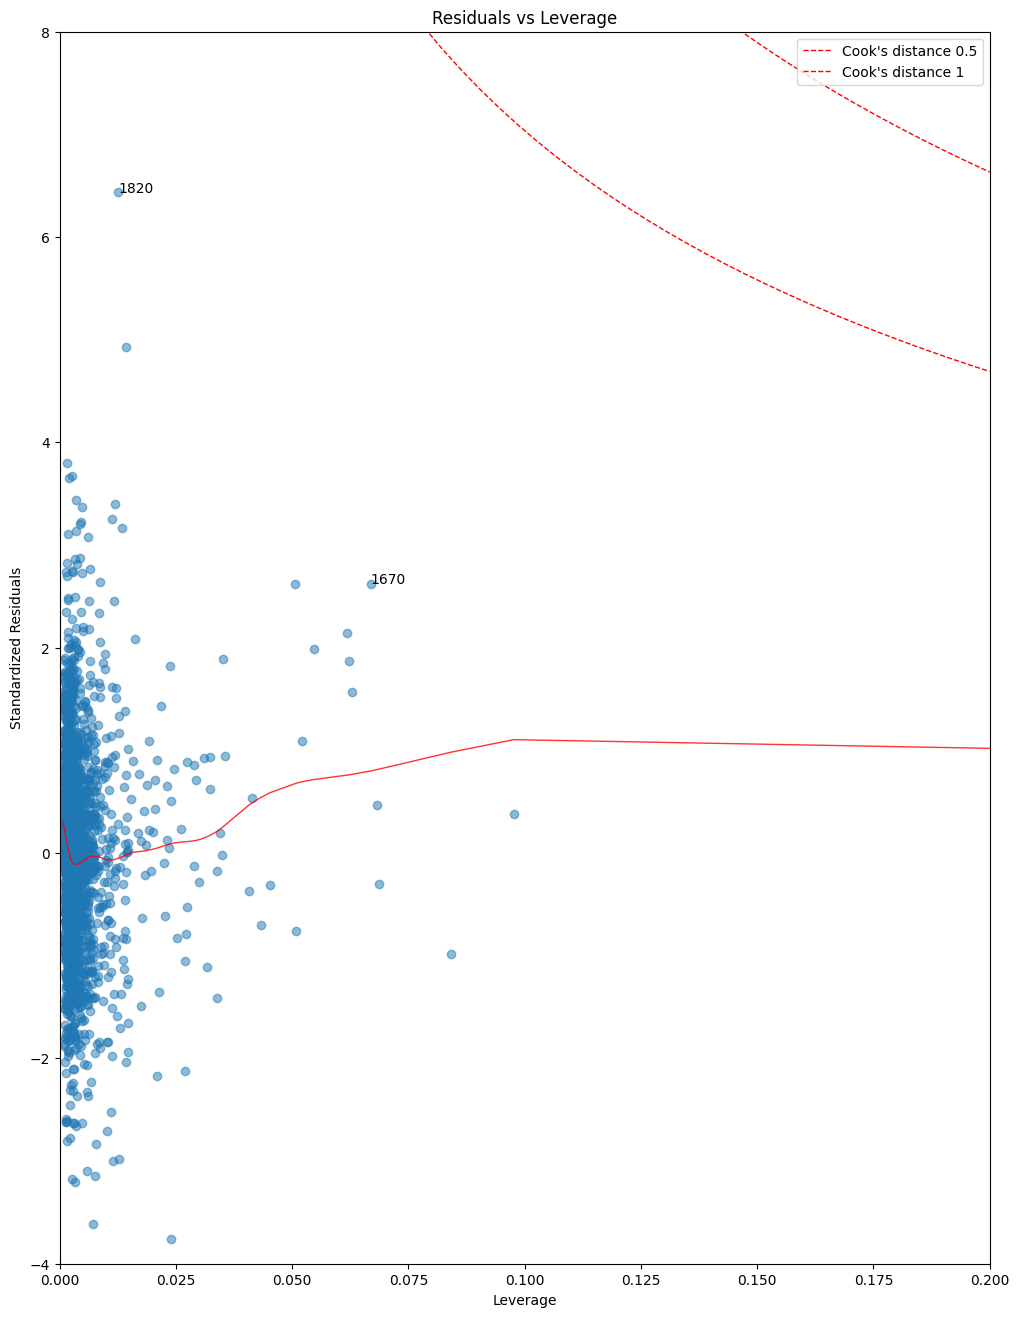

In [88]:
influence = model_log.get_influence()
model_leverage = influence.hat_matrix_diag
model_norm_residuals = influence.resid_studentized_internal
model_cooks = influence.cooks_distance[0]

# Create the leverage plot as described
plot_lm_4 = plt.figure(1)
plot_lm_4.set_figheight(16)
plot_lm_4.set_figwidth(12)

# Scatter plot for leverage vs residuals
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)

# Use sns.regplot to add a lowess line (fit is False for regplot to avoid conflict)
sns.regplot(x=model_leverage, y=model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.2)
plot_lm_4.axes[0].set_ylim(-4, 8)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# Annotations for the top 3 leverage points
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# Function for Cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model.params)  # Number of parameters in the model

# Plot Cook's distance contours
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance 0.5')

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance 1')

plt.legend(loc='upper right')

# Show the plot
plt.show()

Conclusion:
* There is no plot above the line of Cook's Distance 1, meaning there are no influencial outliers for the model.

#### 1.4.4.6 Recheck Independence

In [89]:
# Durbin-Watson test
dw_stat = durbin_watson(model_log.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 1.433483190684177


Conclusion:
* The DW statistic does not change much, showing that the independence is still not ideal enough here.

#### 1.4.4.7 Further Adjustment: Dropping

In [90]:
X_log_drop = df_reg1[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'log average income', 
                      '< high school %','high school %', '> bachelor %']]

y = df_reg1['mean rate']

X_log_drop = sm.add_constant(X_log_drop)
model_log_drop = sm.OLS(y, X_log_drop).fit()

print(model_log_drop.summary())

                            OLS Regression Results                            
Dep. Variable:              mean rate   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1299.
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:33:48   Log-Likelihood:                -2335.7
No. Observations:                2062   AIC:                             4689.
Df Residuals:                    2053   BIC:                             4740.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Conclusion:
* The R-squared and AIC & BIC seems to be almost stable here, so it is not worthwhile to drop from the perspective of goodness of fit for the model.
* So we could keep the model for just log transformation average income.

### 1.4.5 Conclusion for Regression

Conclusion:
* R-squred: R-squared is 0.835, showing that 83.5% of the model could be fit the data and the rest could be explained by those variables not included or random errors.
* P-value: P-value for the model is 0.00, which smaller than alpha, 0.05, indicating there is a significant relationship between mean rate of dignosed diabetes rate and those predictors.
* Individual P-values: The P-values among those predictors are smaller than 0.05 except Asian, Hawaiian and Other Pacific and White, showing they are not significant variables in this model.
* Coeffecient: The coefficient here are positive, except Hawaiian and Other Pacific and log average income, showing there have negative relationship with the mean rate of diagnosed diabetes rate and other variables have the postive relationship.

# 2. Forward Selection

## 2.1 Grocery Density

### 2.1.1 Import Data 

In [91]:
path_grocery = Path('cbp22co.txt.zip')
with zipfile.ZipFile(path_grocery, 'r') as zip_ref:
    txt_file = 'cbp22co.txt'
    
    # Open the file inside the ZIP and read it into a DataFrame
    with zip_ref.open(txt_file) as file:
        df_grocery = pd.read_csv(file, delimiter=',')

### 2.1.2 Observe Data

In [92]:
df_grocery

,fipstate,fipscty,naics,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,...,n20_49,n50_99,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4
0,1,1,------,G,12409,G,117103,G,496158,948,...,102,33,10,3,N,N,N,N,N,N
1,1,1,11----,G,52,G,793,G,3477,10,...,N,N,N,N,N,N,N,N,N,N
2,1,1,113///,H,39,G,686,G,2890,7,...,N,N,N,N,N,N,N,N,N,N
3,1,1,1133//,H,39,G,686,G,2890,7,...,N,N,N,N,N,N,N,N,N,N
4,1,1,11331/,H,39,G,686,G,2890,7,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100799,56,999,81321/,G,6,H,99,H,463,3,...,N,N,N,N,N,N,N,N,N,N
1100800,56,999,813212,G,6,H,99,H,463,3,...,N,N,N,N,N,N,N,N,N,N
1100801,56,999,8133//,J,12,J,309,J,1245,3,...,N,N,N,N,N,N,N,N,N,N
1100802,56,999,81331/,J,12,J,309,J,1245,3,...,N,N,N,N,N,N,N,N,N,N


### 2.1.3 Processing Data

In [93]:
df_grocery['numeric_naics'] = df_grocery['naics'].str.replace(r'\D', '', regex=True)    # to make sure those /,- would not impact the result
df_grocery = df_grocery[df_grocery['numeric_naics'] == '445110']    # 445110 represents grocery
df_grocery = df_grocery[['fipstate', 'fipscty', 'naics','est']].reset_index().drop('index', axis=1) # keep columns we need
df_grocery

,fipstate,fipscty,naics,est
0,1,1,445110,4
1,1,3,445110,30
2,1,5,445110,5
3,1,7,445110,4
4,1,9,445110,4
...,...,...,...,...
2224,56,33,445110,6
2225,56,35,445110,3
2226,56,37,445110,5
2227,56,39,445110,9


In [94]:
df_grocery['fips'] = df_grocery['fipstate'].astype(str) + df_grocery['fipscty'].apply(lambda x: f"{int(x):03}") 
# combine the stacty fips, uniform the style with other data
df_grocery = df_grocery[['fips', 'est']]    # keep columns we need
df_grocery

,fips,est
0,1001,4
1,1003,30
2,1005,5
3,1007,4
4,1009,4
...,...,...
2224,56033,6
2225,56035,3
2226,56037,5
2227,56039,9


In [95]:
df_grocery.isnull().sum()

fips    0
est     0
dtype: int64

In [96]:
df_grocery.describe()

,est
count,2229.000000
mean,27.541498
std,93.133587
min,3.000000
25%,4.000000
50%,7.000000
75%,18.000000
max,1960.000000


In [97]:
df_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fips    2229 non-null   object
 1   est     2229 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.0+ KB


In [98]:
df_grocery = df_grocery.copy()
df_grocery['fips'] = df_grocery['fips'].astype(str)
df_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fips    2229 non-null   object
 1   est     2229 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.0+ KB


Conclusion: 
1. Here we need another data to transfer the fips to the exact location.
2. In order to get the grocery density (number of groceries per million people own), we also need data for population in one location. 

### 2.1.4 Data for County

#### 2.1.4.1 Import Data

In [99]:
path_county = Path('uscounties.csv')
df_county = pd.read_csv(path_county)

#### 2.1.4.2 Observe Data

In [100]:
df_county

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
0,Los Angeles,Los Angeles,Los Angeles County,6037,CA,California,34.3219,-118.2247,9936690
1,Cook,Cook,Cook County,17031,IL,Illinois,41.8401,-87.8168,5225367
2,Harris,Harris,Harris County,48201,TX,Texas,29.8578,-95.3938,4726177
3,Maricopa,Maricopa,Maricopa County,4013,AZ,Arizona,33.3490,-112.4915,4430871
4,San Diego,San Diego,San Diego County,6073,CA,California,33.0343,-116.7350,3289701
...,...,...,...,...,...,...,...,...,...
3139,Blaine,Blaine,Blaine County,31009,NE,Nebraska,41.9128,-99.9768,384
3140,King,King,King County,48269,TX,Texas,33.6165,-100.2558,216
3141,Kenedy,Kenedy,Kenedy County,48261,TX,Texas,26.9285,-97.7017,116
3142,Loving,Loving,Loving County,48301,TX,Texas,31.8493,-103.5800,96


#### 2.1.4.3 Processing Data

In [101]:
df_county = df_county[['county', 'county_fips', 'state_id', 'population']]  # keep columns we need
df_county.columns = ['county', 'fips', 'state', 'population']   # rename columns for future merge
df_county

,county,fips,state,population
0,Los Angeles,6037,CA,9936690
1,Cook,17031,IL,5225367
2,Harris,48201,TX,4726177
3,Maricopa,4013,AZ,4430871
4,San Diego,6073,CA,3289701
...,...,...,...,...
3139,Blaine,31009,NE,384
3140,King,48269,TX,216
3141,Kenedy,48261,TX,116
3142,Loving,48301,TX,96


In [102]:
df_county.isnull().sum()

county        0
fips          0
state         0
population    0
dtype: int64

In [103]:
df_county.describe()

,fips,population
count,3144.000000,3.144000e+03
mean,30368.187023,1.053109e+05
std,15170.427484,3.337924e+05
min,1001.000000,5.000000e+01
25%,18174.500000,1.083575e+04
50%,29174.000000,2.578450e+04
75%,45079.500000,6.807975e+04
max,56045.000000,9.936690e+06


In [104]:
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      3144 non-null   object
 1   fips        3144 non-null   int64 
 2   state       3144 non-null   object
 3   population  3144 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 98.4+ KB


In [105]:
df_county = df_county.copy()
df_county['fips'] = df_county['fips'].astype(str)
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      3144 non-null   object
 1   fips        3144 non-null   object
 2   state       3144 non-null   object
 3   population  3144 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 98.4+ KB


### 2.1.5 Futher Processing

In [106]:
df_density = pd.merge(df_grocery, df_county, on=['fips'])
df_density

,fips,est,county,state,population
0,1001,4,Autauga,AL,58761
1,1003,30,Baldwin,AL,233420
2,1005,5,Barbour,AL,24877
3,1007,4,Bibb,AL,22251
4,1009,4,Blount,AL,59077
...,...,...,...,...,...
2224,56033,6,Sheridan,WY,31176
2225,56035,3,Sublette,WY,8801
2226,56037,5,Sweetwater,WY,42079
2227,56039,9,Teton,WY,23346


In [107]:
df_density['density'] = df_density['est'] / df_density['population'] * 1000000
df_density = df_density[['county', 'state', 'density']]
df_density

,county,state,density
0,Autauga,AL,68.072361
1,Baldwin,AL,128.523691
2,Barbour,AL,200.988865
3,Bibb,AL,179.767201
4,Blount,AL,67.708245
...,...,...,...
2224,Sheridan,WY,192.455735
2225,Sublette,WY,340.870356
2226,Sweetwater,WY,118.824117
2227,Teton,WY,385.505012


In [108]:
df_reg1

,county,state,mean rate,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White,average income,< high school %,...,college or associate %,> bachelor %,log Indian and Alaska,log Asian,log Black,log Hawaiian and Other Pacific,log average income,log > bachelor %,log < high school %,Transformed White
0,Autauga,AL,9.825000,0.5,1.2,20.1,0.1,76.3,50688.000000,9.597392,...,29.697920,29.558575,0.405465,0.788457,3.049273,0.095310,10.833444,3.386374,2.261491,0.949532
1,Baldwin,AL,8.230714,0.8,1.1,8.8,0.1,87.4,58291.666667,8.400690,...,31.262349,32.561579,0.587787,0.741937,2.282382,0.095310,10.973214,3.483133,2.128314,0.936500
2,Barbour,AL,12.485000,0.7,0.5,48.2,0.2,49.2,41172.000000,23.507779,...,27.796322,11.881188,0.530628,0.405465,3.895894,0.182322,10.625514,2.474956,3.157331,0.961349
3,Bibb,AL,10.394286,0.5,0.2,21.3,0.1,76.8,38464.333333,21.136578,...,27.064364,10.919937,0.405465,0.182322,3.104587,0.095310,10.557487,2.390590,3.051005,0.949132
4,Blount,AL,9.632857,0.6,0.3,1.7,0.1,95.8,44019.666667,18.244849,...,31.700027,14.741407,0.470004,0.262364,0.993252,0.095310,10.692392,2.690660,2.903883,0.913220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,Sweetwater,WY,7.512143,1.5,1.1,1.4,0.2,93.8,60126.666667,6.954410,...,40.410959,19.982605,0.916291,0.741937,0.875469,0.182322,11.004209,2.994862,1.939376,0.920928
2058,Teton,WY,4.703571,0.9,1.7,0.7,0.1,95.0,414561.000000,4.034018,...,19.023107,60.292061,0.641854,0.993252,0.530628,0.095310,12.934975,4.099200,1.394763,0.916546
2059,Uinta,WY,6.961429,1.4,0.5,0.8,0.2,95.3,46812.000000,5.635076,...,38.940786,19.105017,0.875469,0.405465,0.587787,0.182322,10.753895,2.949951,1.729011,0.915341
2060,Washakie,WY,7.074286,1.8,0.8,0.6,0.1,94.5,56942.333333,5.288897,...,45.118638,21.137475,1.029619,0.587787,0.470004,0.095310,10.949794,3.051048,1.665610,0.918453


In [109]:
df_reg2 = pd.merge(df_reg1, df_density, on=['state', 'county'])
df_reg2

,county,state,mean rate,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White,average income,< high school %,...,> bachelor %,log Indian and Alaska,log Asian,log Black,log Hawaiian and Other Pacific,log average income,log > bachelor %,log < high school %,Transformed White,density
0,Autauga,AL,9.825000,0.5,1.2,20.1,0.1,76.3,50688.000000,9.597392,...,29.558575,0.405465,0.788457,3.049273,0.095310,10.833444,3.386374,2.261491,0.949532,68.072361
1,Baldwin,AL,8.230714,0.8,1.1,8.8,0.1,87.4,58291.666667,8.400690,...,32.561579,0.587787,0.741937,2.282382,0.095310,10.973214,3.483133,2.128314,0.936500,128.523691
2,Barbour,AL,12.485000,0.7,0.5,48.2,0.2,49.2,41172.000000,23.507779,...,11.881188,0.530628,0.405465,3.895894,0.182322,10.625514,2.474956,3.157331,0.961349,200.988865
3,Bibb,AL,10.394286,0.5,0.2,21.3,0.1,76.8,38464.333333,21.136578,...,10.919937,0.405465,0.182322,3.104587,0.095310,10.557487,2.390590,3.051005,0.949132,179.767201
4,Blount,AL,9.632857,0.6,0.3,1.7,0.1,95.8,44019.666667,18.244849,...,14.741407,0.470004,0.262364,0.993252,0.095310,10.692392,2.690660,2.903883,0.913220,67.708245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,Sheridan,WY,6.662857,1.3,0.9,0.9,0.1,95.0,69334.666667,3.692280,...,32.128277,0.832909,0.641854,0.641854,0.095310,11.146700,3.469737,1.306244,0.916546,192.455735
1531,Sublette,WY,5.963571,1.2,0.8,0.9,0.0,95.5,67225.333333,4.139715,...,25.582147,0.788457,0.587787,0.641854,0.000000,11.115805,3.241895,1.420627,0.914510,340.870356
1532,Sweetwater,WY,7.512143,1.5,1.1,1.4,0.2,93.8,60126.666667,6.954410,...,19.982605,0.916291,0.741937,0.875469,0.182322,11.004209,2.994862,1.939376,0.920928,118.824117
1533,Teton,WY,4.703571,0.9,1.7,0.7,0.1,95.0,414561.000000,4.034018,...,60.292061,0.641854,0.993252,0.530628,0.095310,12.934975,4.099200,1.394763,0.916546,385.505012


### 2.1.6 Multiple Regression

In [110]:
X = df_reg2[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White',
                'log average income', '< high school %','high school %', 'college or associate %',
                '> bachelor %', 'density']]

y = df_reg2['mean rate']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              mean rate   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     758.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:33:50   Log-Likelihood:                -1670.0
No. Observations:                1535   AIC:                             3362.
Df Residuals:                    1524   BIC:                             3421.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Conclusion:
* The R-squared drops from 0.835 to 0.833 showing that the goodness of fit drops a little.
* The P-value keeps the same.
* The AIC drops from 4691 to 3362 and the BIC drops from 4748 to 3421, showing the huge improvement of goodness of fit.
* Comprehensively speaking, we think we could accpet add grocery density as a variable from fitness perspective, and we shall also do the assumption check in the following content.
* The cofficient of density is negative, showing that higher grocery density could conduct lower rate of diagnosed diabetes rate just as we assumed and the p-value is smaller than 0.05, indicating that grocery is a significant variable here. 

### 2.1.7 Assumption Check

#### 2.1.7.1 Normality

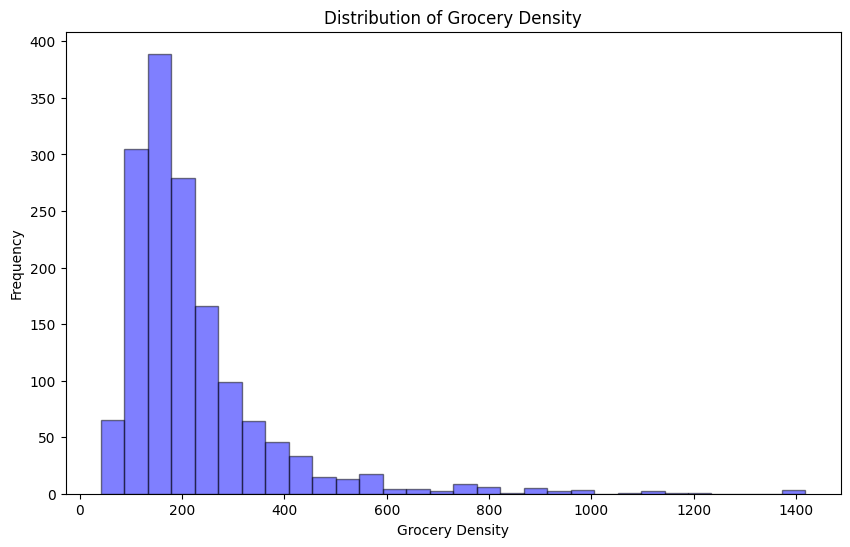

In [111]:
plt.figure(figsize=(10, 6))
plt.hist(df_reg2['density'], bins=30, color='blue', edgecolor='black', alpha=0.5)
plt.title('Distribution of Grocery Density')
plt.xlabel('Grocery Density')
plt.ylabel('Frequency')
plt.show()

Conclusion:
* The distribution of grocery density here is right-skewed.

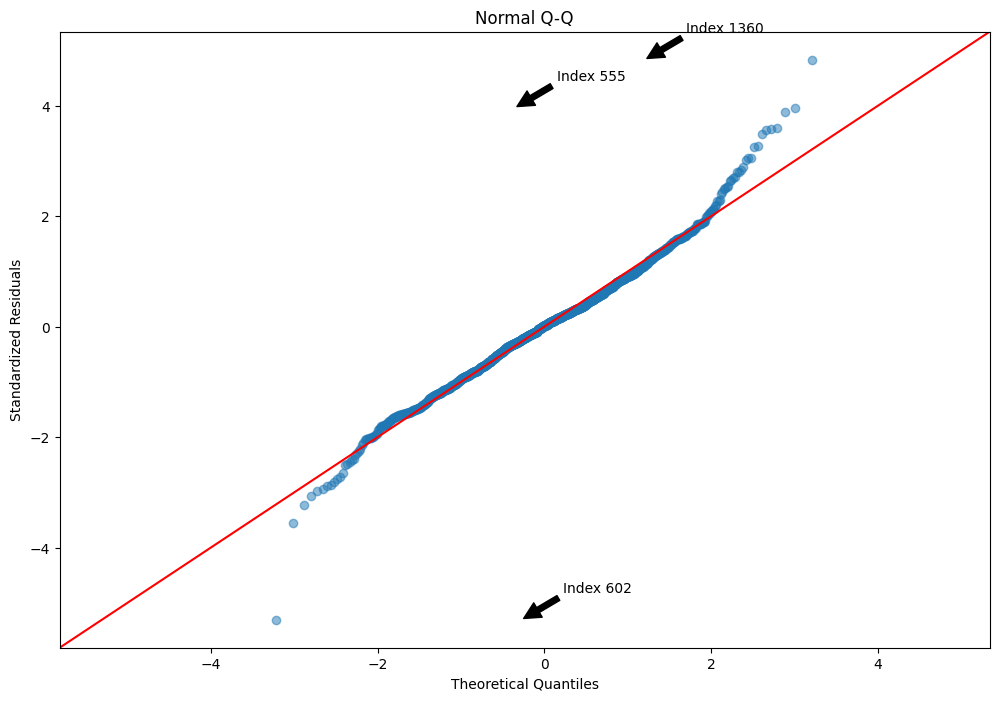

In [112]:
model_fitted_y = model.fittedvalues  # Predicted (fitted) values
model_residuals = model.resid  # Residuals
model_abs_resid = abs(model_residuals)  # Absolute residuals
model_std_residuals = model.get_influence().resid_studentized_internal  # Standardized residuals

# Q-Q plot of standardized residuals
QQ = ProbPlot(model_std_residuals)  
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, lw=1)

# Set figure size and title
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

# Annotate the top 3 largest residuals
# Use standardized residuals to find the largest values
abs_norm_resid = np.flip(np.argsort(np.abs(model_std_residuals)), 0)  # Get indices of largest residuals
abs_norm_resid_top_3 = abs_norm_resid[:3]

# Annotate the top 3 residuals
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(f'Index {i}', 
                               xy=(QQ.theoretical_quantiles[i], model_std_residuals[i]),
                               xytext=(QQ.theoretical_quantiles[i] + 0.5, model_std_residuals[i] + 0.5),
                               arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

Conclusion:
* The QQ plot shows that the model could still satisfy the normality assumption, thus we do not need to transform the density for the normality assumption.

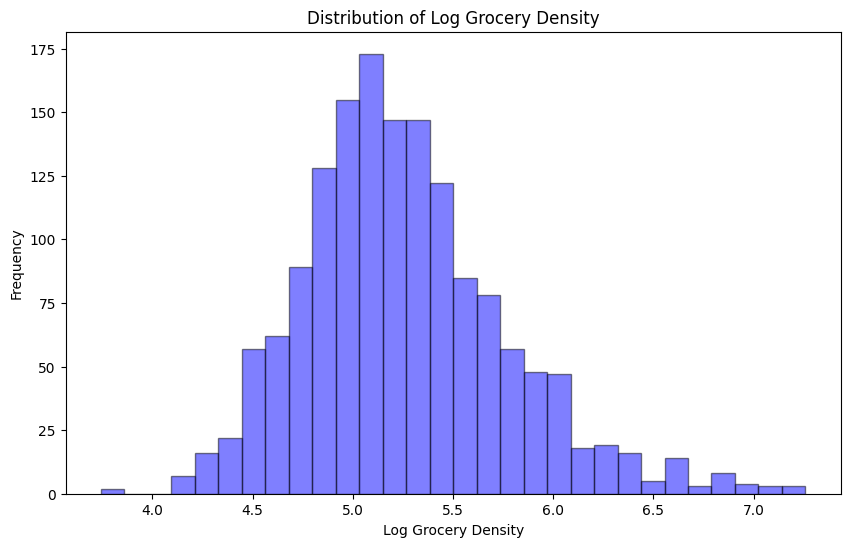

In [113]:
df_reg2['log density'] = np.log(df_reg2['density'] + 1)
plt.figure(figsize=(10, 6))
plt.hist(df_reg2['log density'], bins=30, color='blue', edgecolor='black', alpha=0.5)
plt.title('Distribution of Log Grocery Density')
plt.xlabel('Log Grocery Density')
plt.ylabel('Frequency')
plt.show()

Conclusion
* After log transformation, it looks like normal distribution.

In [114]:
X = df_reg2[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White',
                'log average income', '< high school %','high school %', 'college or associate %',
                '> bachelor %', 'log density']]

y = df_reg2['mean rate']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              mean rate   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     784.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:33:51   Log-Likelihood:                -1648.0
No. Observations:                1535   AIC:                             3318.
Df Residuals:                    1524   BIC:                             3377.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Conclusion:
* Considering the higher R-squared and lower AIC & BIC, transformation here could be a better choice.
* The coefficient and p-value here could allow us to keep the conclusion above.

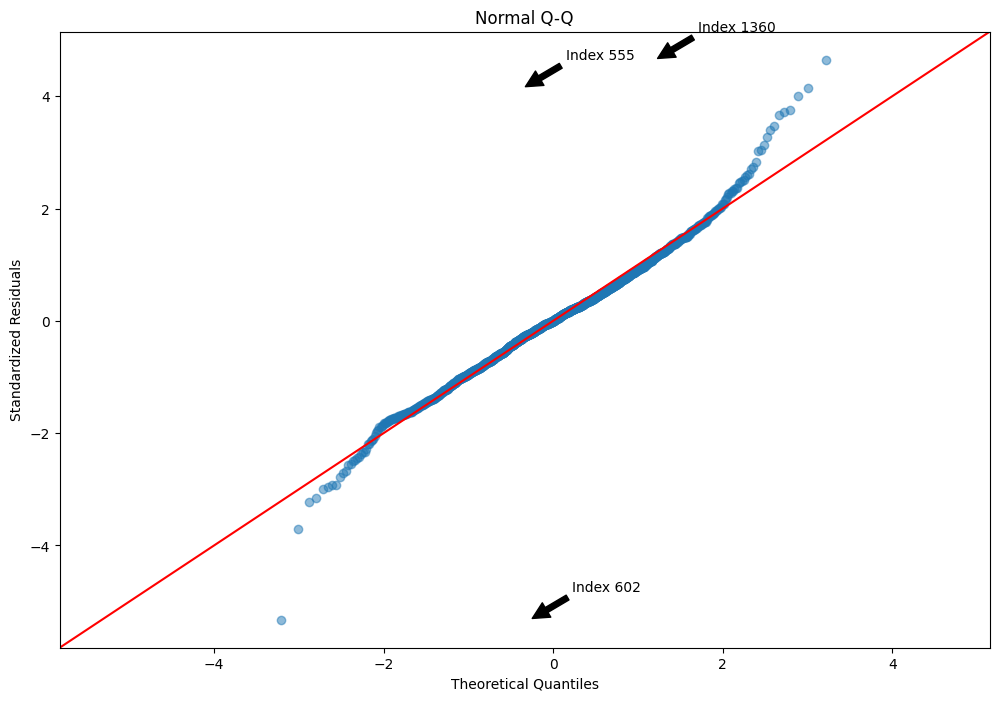

In [115]:
model_fitted_y = model.fittedvalues  # Predicted (fitted) values
model_residuals = model.resid  # Residuals
model_abs_resid = abs(model_residuals)  # Absolute residuals
model_std_residuals = model.get_influence().resid_studentized_internal  # Standardized residuals

# Q-Q plot of standardized residuals
QQ = ProbPlot(model_std_residuals)  
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, lw=1)

# Set figure size and title
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

# Annotate the top 3 largest residuals
# Use standardized residuals to find the largest values
abs_norm_resid = np.flip(np.argsort(np.abs(model_std_residuals)), 0)  # Get indices of largest residuals
abs_norm_resid_top_3 = abs_norm_resid[:3]

# Annotate the top 3 residuals
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(f'Index {i}', 
                               xy=(QQ.theoretical_quantiles[i], model_std_residuals[i]),
                               xytext=(QQ.theoretical_quantiles[i] + 0.5, model_std_residuals[i] + 0.5),
                               arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

Conclusion:
* According to the QQ plot, the model still shows the normality here.

#### 2.1.7.2 Linearity

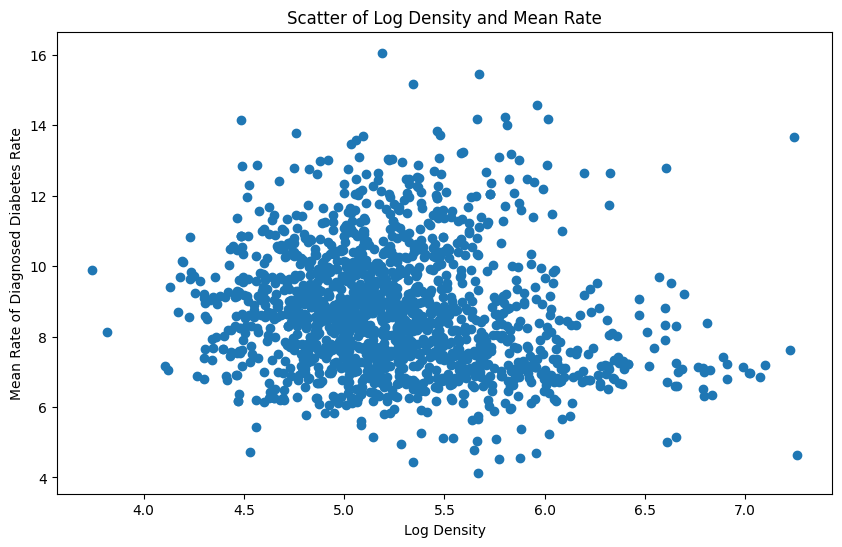

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(df_reg2['log density'], df_reg2['mean rate'])
plt.title('Scatter of Log Density and Mean Rate')
plt.xlabel('Log Density')
plt.ylabel('Mean Rate of Diagnosed Diabetes Rate')
plt.show()

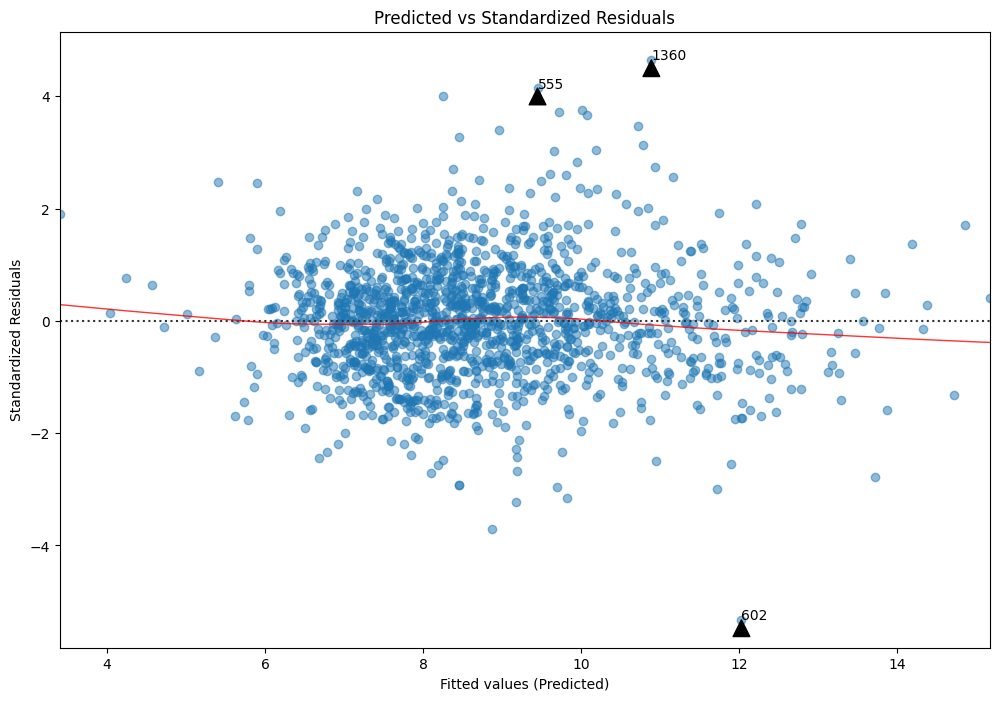

In [117]:
# Create the plot
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# Residuals vs Fitted plot
sns.residplot(x=model_fitted_y, y=model_std_residuals, 
              lowess=True, 
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.title('Predicted vs Standardized Residuals')
plt.xlabel('Fitted values (Predicted)')
plt.ylabel('Standardized Residuals')

# Annotate the top 3 largest residuals
abs_resid_top_3 = model_abs_resid.sort_values(ascending=False)[:3]

for i in abs_resid_top_3.index:
    plt.annotate(i, 
                 xy=(model_fitted_y[i], model_std_residuals[i]),
                 xytext=(model_fitted_y[i], model_std_residuals[i]),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

Conclusion:
* Apparently, it could not satisfy the linearity assumption just like previous work.

#### 2.1.7.3 Multicollinearity

In [118]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/Users/cherongtian/Desktop/python/.venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/cherongtian/Desktop/python/.venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,const,0.000000
1,Indian and Alaska,58.712038
2,Asian,15.702533
3,Black,285.233490
4,Hawaiian and Other Pacific,3.154259
5,White,331.179039
6,log average income,2.470286
7,< high school %,inf
8,high school %,inf
9,college or associate %,inf


In [119]:
X_log_drop = df_reg2[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'log average income', 
                      '< high school %','high school %', '> bachelor %', 'log density']]
# drop White and College or Associate rate here
vif_data = pd.DataFrame()
vif_data["Variable"] = X_log_drop.columns
vif_data["VIF"] = [variance_inflation_factor(X_log_drop.values, i) for i in range(X_log_drop.shape[1])]
vif_data

,Variable,VIF
0,Indian and Alaska,1.171951
1,Asian,3.057392
2,Black,1.812308
3,Hawaiian and Other Pacific,1.689496
4,log average income,376.718258
5,< high school %,12.575451
6,high school %,75.451147
7,> bachelor %,50.558109
8,log density,114.836214


Conclusion:
* The issue is the same as above content, we think we do not need to drop variables even from multicollinearity perspective.

#### 2.1.7.4 Constant Variance

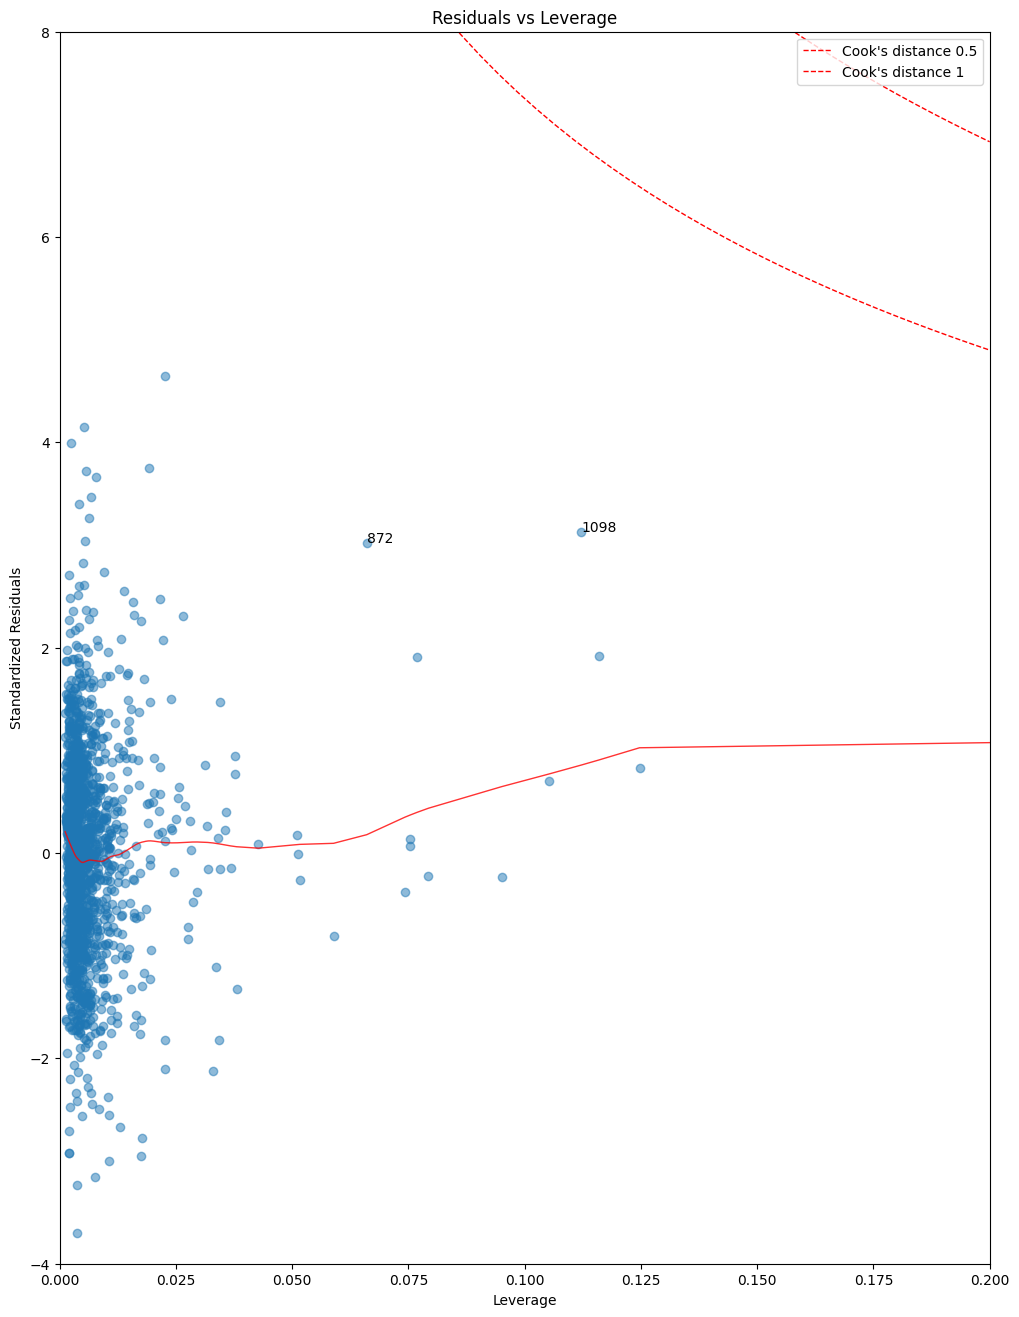

In [120]:
influence = model.get_influence()
model_leverage = influence.hat_matrix_diag
model_norm_residuals = influence.resid_studentized_internal
model_cooks = influence.cooks_distance[0]

# Create the leverage plot as described
plot_lm_4 = plt.figure(1)
plot_lm_4.set_figheight(16)
plot_lm_4.set_figwidth(12)

# Scatter plot for leverage vs residuals
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)

# Use sns.regplot to add a lowess line (fit is False for regplot to avoid conflict)
sns.regplot(x=model_leverage, y=model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.2)
plot_lm_4.axes[0].set_ylim(-4, 8)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# Annotations for the top 3 leverage points
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# Function for Cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model.params)  # Number of parameters in the model

# Plot Cook's distance contours
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance 0.5')

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance 1')

plt.legend(loc='upper right')

# Show the plot
plt.show()

Conclusion:
* There is not plot above the Cook's Distance 1 line, showing that there is no influencial outliers.

#### 2.1.7.5 Independence

In [121]:
# Durbin-Watson test
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 1.474598967549526


Conclusion:
* The DW statistic is a little bit closer to 2 than the model before forward selection, showing that from independence perspective, the model is better.

#### 2.1.7.6 Conclusion for Assumption Check

In [122]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              mean rate   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     784.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:33:52   Log-Likelihood:                -1648.0
No. Observations:                1535   AIC:                             3318.
Df Residuals:                    1524   BIC:                             3377.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Conclusion:
* 

## 2.2 Crime Rate

### 2.2.1 Import Data

In [123]:
path_crime = Path('crime_data_w_population_and_crime_rate.csv')
df_crime = pd.read_csv(path_crime)

### 2.2.2 Observe Data

In [124]:
df_crime

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,...,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,...,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,...,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,4,17,368,149,494,60,0,27083,22,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,"Ohio County, IN",0.000000,3132,1,4,762,6084,0,2,1,...,0,0,0,2,2,0,0,5994,18,115
3132,"Newton County, MS",0.000000,3133,1,4,1465,21545,3346,3,1,...,0,0,0,4,0,1,0,21689,28,101
3133,"Jerauld County, SD",0.000000,3134,1,4,2424,2108,2108,1,1,...,0,0,0,1,3,1,0,2066,46,73
3134,"Cimarron County, OK",0.000000,3135,1,4,2167,2502,2502,2,2,...,0,0,0,1,2,0,0,2335,40,25


### 2.2.3 Processing Data

In [125]:
df_crime = df_crime[df_crime['crime_rate_per_100000'] != 0]
df_crime = df_crime[['county_name', 'crime_rate_per_100000']]
df_crime

,county_name,crime_rate_per_100000
0,"St. Louis city, MO",1791.995377
1,"Crittenden County, AR",1754.914968
2,"Alexander County, IL",1664.700485
3,"Kenedy County, TX",1456.310680
4,"De Soto Parish, LA",1447.402430
...,...,...
2970,"Boone County, IL",7.413311
2971,"Newton County, TX",7.072136
2972,"Baker County, OR",6.242977
2973,"Jasper County, MS",6.071645


In [126]:
df_crime = df_crime.copy()

df_crime['state'] = df_crime['county_name'].str.split(',').str[1].str.strip()   # extract the state name
df_crime['county_name'] = df_crime['county_name'].str.split(',').str[0].str.strip() # remove state name from the original column
df_crime = df_crime[~df_crime['county_name'].str.contains('city', case=False)]  # exclude rows containing "city"

df_crime

,county_name,crime_rate_per_100000,state
1,Crittenden County,1754.914968,AR
2,Alexander County,1664.700485,IL
3,Kenedy County,1456.310680,TX
4,De Soto Parish,1447.402430,LA
6,Shelby County,1315.003752,TN
...,...,...,...
2970,Boone County,7.413311,IL
2971,Newton County,7.072136,TX
2972,Baker County,6.242977,OR
2973,Jasper County,6.071645,MS


In [127]:
df_crime['county_name'] = df_crime['county_name'].str.replace('County', '', case=False).str.strip() # remove the word "County" from the remaining content
df_crime = df_crime.reset_index().drop('index', axis=1)
df_crime

,county_name,crime_rate_per_100000,state
0,Crittenden,1754.914968,AR
1,Alexander,1664.700485,IL
2,Kenedy,1456.310680,TX
3,De Soto Parish,1447.402430,LA
4,Shelby,1315.003752,TN
...,...,...,...
2924,Boone,7.413311,IL
2925,Newton,7.072136,TX
2926,Baker,6.242977,OR
2927,Jasper,6.071645,MS


In [128]:
df_crime = df_crime.rename(columns={'county_name': 'county',
                                    'crime_rate_per_100000': 'crime rate'})
df_crime

,county,crime rate,state
0,Crittenden,1754.914968,AR
1,Alexander,1664.700485,IL
2,Kenedy,1456.310680,TX
3,De Soto Parish,1447.402430,LA
4,Shelby,1315.003752,TN
...,...,...,...
2924,Boone,7.413311,IL
2925,Newton,7.072136,TX
2926,Baker,6.242977,OR
2927,Jasper,6.071645,MS


In [129]:
df_crime.isnull().sum()

county        0
crime rate    0
state         0
dtype: int64

In [130]:
df_crime.describe()

,crime rate
count,2929.000000
mean,246.309024
std,195.249941
min,4.190939
25%,109.021532
50%,194.383904
75%,330.478182
max,1754.914968


In [131]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   county      2929 non-null   object 
 1   crime rate  2929 non-null   float64
 2   state       2929 non-null   object 
dtypes: float64(1), object(2)
memory usage: 68.8+ KB


### 2.2.4 Multiple Regression

In [132]:
df_reg3 = pd.merge(df_reg2, df_crime, on=['state', 'county'])
df_reg3

,county,state,mean rate,Indian and Alaska,Asian,Black,Hawaiian and Other Pacific,White,average income,< high school %,...,log Asian,log Black,log Hawaiian and Other Pacific,log average income,log > bachelor %,log < high school %,Transformed White,density,log density,crime rate
0,Autauga,AL,9.825000,0.5,1.2,20.1,0.1,76.3,50688.000000,9.597392,...,0.788457,3.049273,0.095310,10.833444,3.386374,2.261491,0.949532,68.072361,4.235155,251.601926
1,Baldwin,AL,8.230714,0.8,1.1,8.8,0.1,87.4,58291.666667,8.400690,...,0.741937,2.282382,0.095310,10.973214,3.483133,2.128314,0.936500,128.523691,4.863864,228.086325
2,Barbour,AL,12.485000,0.7,0.5,48.2,0.2,49.2,41172.000000,23.507779,...,0.405465,3.895894,0.182322,10.625514,2.474956,3.157331,0.961349,200.988865,5.308213,177.278771
3,Bibb,AL,10.394286,0.5,0.2,21.3,0.1,76.8,38464.333333,21.136578,...,0.182322,3.104587,0.095310,10.557487,2.390590,3.051005,0.949132,179.767201,5.197210,217.661691
4,Blount,AL,9.632857,0.6,0.3,1.7,0.1,95.8,44019.666667,18.244849,...,0.262364,0.993252,0.095310,10.692392,2.690660,2.903883,0.913220,67.708245,4.229869,210.810064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,Sheridan,WY,6.662857,1.3,0.9,0.9,0.1,95.0,69334.666667,3.692280,...,0.641854,0.641854,0.095310,11.146700,3.469737,1.306244,0.916546,192.455735,5.265049,93.884120
1503,Sublette,WY,5.963571,1.2,0.8,0.9,0.0,95.5,67225.333333,4.139715,...,0.587787,0.641854,0.000000,11.115805,3.241895,1.420627,0.914510,340.870356,5.834432,119.510009
1504,Sweetwater,WY,7.512143,1.5,1.1,1.4,0.2,93.8,60126.666667,6.954410,...,0.741937,0.875469,0.182322,11.004209,2.994862,1.939376,0.920928,118.824117,4.786025,433.273648
1505,Teton,WY,4.703571,0.9,1.7,0.7,0.1,95.0,414561.000000,4.034018,...,0.993252,0.530628,0.095310,12.934975,4.099200,1.394763,0.916546,385.505012,5.957145,179.629962


In [133]:
X = df_reg3[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White',
                'log average income', '< high school %','high school %', 'college or associate %',
                '> bachelor %', 'log density', 'crime rate']]

y = df_reg3['mean rate']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              mean rate   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     696.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:33:52   Log-Likelihood:                -1617.3
No. Observations:                1507   AIC:                             3259.
Df Residuals:                    1495   BIC:                             3322.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### 2.2.5 Transformation

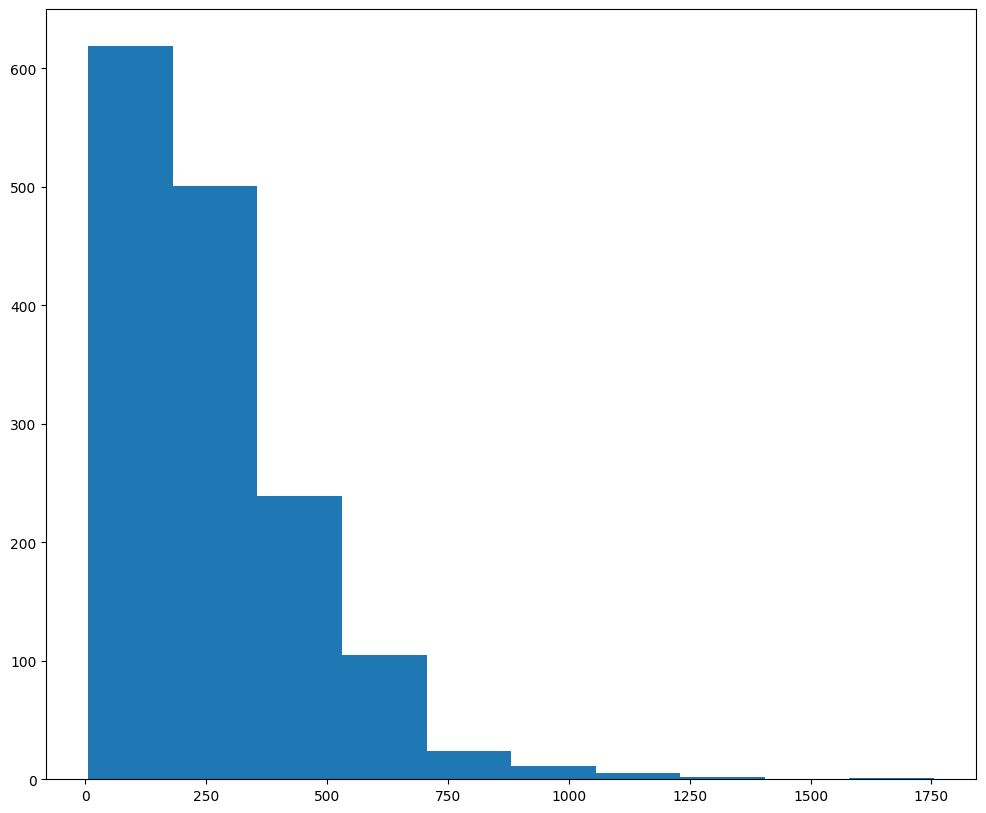

In [134]:
plt.figure(figsize=(12, 10))
plt.hist(df_reg3['crime rate'])
plt.show()

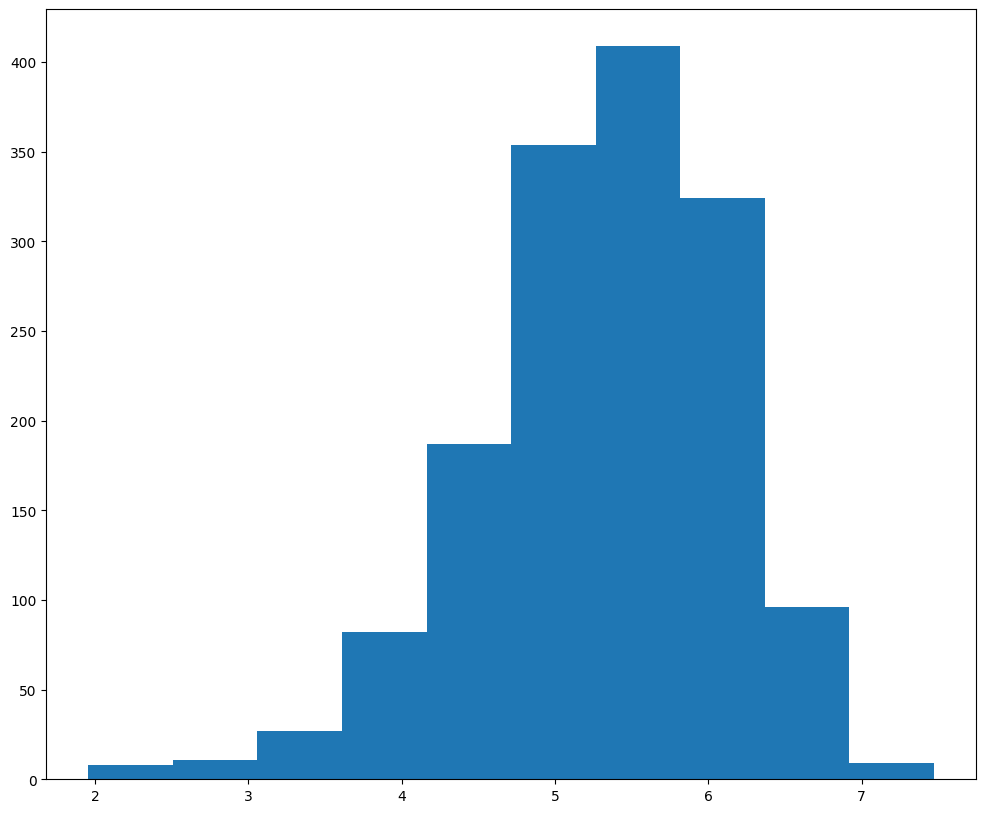

In [135]:
df_reg3['log crime rate'] = np.log(df_reg3['crime rate'] + 1)
plt.figure(figsize=(12, 10))
plt.hist(df_reg3['log crime rate'])
plt.show()

In [136]:
X = df_reg3[['Indian and Alaska', 'Asian', 'Black', 'Hawaiian and Other Pacific', 'White',
                'log average income', '< high school %','high school %', 'college or associate %',
                '> bachelor %', 'log density', 'log crime rate']]

y = df_reg3['mean rate']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              mean rate   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     696.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:41:49   Log-Likelihood:                -1617.8
No. Observations:                1507   AIC:                             3260.
Df Residuals:                    1495   BIC:                             3323.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### 2.2.5.1 Conclusion